In [1]:
%load_ext autoreload

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Rectangle
from gazeheatpoints import draw_heatmap
sns.set(style='darkgrid', context='notebook',font_scale=1.1)

In [3]:
%autoreload
sys.path.insert(0,'../')
from scripts.loader import *
import mytools as tl

# Datos

In [4]:
data_path = os.path.join('..', 'Datasets', 'Interiors')
resp_path = os.path.join(data_path, 'responses')
subj_path = os.path.join(data_path, 'human_scanpaths')
figs_path = os.path.join(os.getcwd(), 'figs')

In [5]:
subjs = load_human_scanpaths(subj_path, 'all')

In [6]:
responses = pd.read_csv(os.path.join(resp_path, 'responses_data.csv')).set_index(['subj_id','image'])
responses.loc[22,'grayscale_11_opensource.jpg']

subj                          fac
response_y                    829
response_x                   1119
response_size                  11
response_time_click      2.366613
response_time_circle    24.016633
Name: (22, grayscale_11_opensource.jpg), dtype: object

In [7]:
trials_data = load_trials_properties(os.path.join(subj_path,'..', 'trials_properties.json'))
trials_data = pd.DataFrame(trials_data).set_index('image')
trials_data.head()

target  \
image                                                                       
grayscale_1_housebeautiful.jpg  grayscale_1_housebeautiful_template_2.jpg   
grayscale_1_kitchen.jpg                grayscale_1_kitchen_template_1.jpg   
grayscale_1_oliva.jpg                    grayscale_1_oliva_template_1.jpg   
grayscale_1_opensource.jpg          grayscale_1_opensource_template_1.jpg   
grayscale_2_housebeautiful.jpg  grayscale_2_housebeautiful_template_3.jpg   

                                          dataset  target_matched_row  \
image                                                                   
grayscale_1_housebeautiful.jpg  Interiors Dataset                 155   
grayscale_1_kitchen.jpg         Interiors Dataset                 270   
grayscale_1_oliva.jpg           Interiors Dataset                 605   
grayscale_1_opensource.jpg      Interiors Dataset                 376   
grayscale_2_housebeautiful.jpg  Interiors Dataset                 499   

                                target_matched_column  target_height  \
image                                                                  
grayscale_1_housebeautiful.jpg                    130             72   
grayscale_1_kitchen.jpg                           855             72   
grayscale_1_oliva.jpg                             106             72   
grayscale_1_opensource.jpg                        700             72   
grayscale_2_housebeautiful.jpg                    447             72   

                                target_width  image_height  image_width  \
image                                                                     
grayscale_1_housebeautiful.jpg            72           768         1024   
grayscale_1_kitchen.jpg                   72           768         1024   
grayscale_1_oliva.jpg                     72           768         1024   
grayscale_1_opensource.jpg                72           768         1024   
grayscale_2_housebeautiful.jpg            72           768         1024   

                                initial_fixation_row  initial_fixation_column  \
image                                                                           
grayscale_1_housebeautiful.jpg                   113                      515   
grayscale_1_kitchen.jpg                          620                      718   
grayscale_1_oliva.jpg                            718                      492   
grayscale_1_opensource.jpg                       657                      997   
grayscale_2_housebeautiful.jpg                   471                      835   

                               target_object  
image                                         
grayscale_1_housebeautiful.jpg         clock  
grayscale_1_kitchen.jpg                 bowl  
grayscale_1_oliva.jpg                    cup  
grayscale_1_opensource.jpg               TBD  
grayscale_2_housebeautiful.jpg          bowl

## Agregar las respuestas y chequeo de datos

In [8]:
# algunos chequeos
tl.dimensions_check_scanpaths_dict(subj_path)

Dimesions are OK, X: columns/widht, Y: rows/heigth


In [9]:
save_path = os.path.join('..', 'Datasets', 'Interiors_Responses')

In [10]:
%autoreload
# CORRER SOLO UNA VEZ - funcion que agrega las respuestas y algunas variables extras al diccionario
# tl.add_responses(subj_path, responses_path=resp_path, save_path=save_path, change_scanpaths=True, calculate_features=False)

In [11]:
os.path.join(resp_path, 'human_scanpaths')

'../Datasets/Interiors/responses/human_scanpaths'

In [12]:
# carga de los sujetos con las respuestas almacenadas en un diccionario
subjs_response = load_human_scanpaths(os.path.join(resp_path, 'human_scanpaths'), human_subject='all')
subjs_response[1][list(subjs_response[1].keys())[0]]

{'subject': '01',
 'dataset': 'Interiors Dataset',
 'image_height': 768,
 'image_width': 1024,
 'screen_height': 960,
 'screen_width': 1280,
 'receptive_height': 32,
 'receptive_width': 32,
 'target_found': False,
 'target_bbox': [559, 228, 631, 300],
 'X': [623.5, 507.6, 367.4, 385.7, 656.6, 401.7, 349.8, 327.0],
 'Y': [758.9, 434.0, 338.6, 509.70000000000005, 407.4, 588.3, 557.3, 551.1],
 'T': [1449, 130, 244, 296, 396, 327, 360, 539],
 'target_object': 'TBD',
 'max_fixations': 13,
 'subject_name': 'AFR',
 'initial_fixation_row': 754,
 'initial_fixation_column': 585,
 'response_x': 226.0,
 'response_y': 495.0,
 'response_size': 17,
 'response_click': 9.40012257278431,
 'response_circle': 18.2170030085836,
 'distance_to_target': 106.97663296253066,
 'distance_to_last_fix': 115.53445373567143,
 'last_fix_dur': -1,
 'target_found_response': False,
 'delta_time_response': 8.81688043579929}

## Limpieza del dataframe
TODO: Esto podría pasarlo en el futuro a la función get_responses_features

In [13]:
# dataframe de relevancia para explorar las respuestas
responses_data = tl.get_responses_features(subjs_response)
responses_data.head()

subj                              img  max_fixations  scanpath_length  \
0    41      grayscale_11_opensource.jpg             13               10   
1    41  grayscale_18_housebeautiful.jpg              9               10   
2    41          grayscale_100_oliva.jpg              5                3   
3    41           grayscale_17_oliva.jpg              3                2   
4    41  grayscale_16_housebeautiful.jpg              3                4   

   target_found  target_found_response  response_size  \
0         False                  False             29   
1         False                  False             47   
2          True                  False             19   
3         False                  False             35   
4         False                  False             19   

   distance_response_to_target  distance_to_last_fix  delta_time_response  \
0                   266.810794            213.164661            49.599536   
1                   329.200547            411.615026             9.666707   
2                   202.054448            204.544005             5.633140   
3                   297.692795            208.923431             4.266648   
4                   568.198029            223.650531             2.900187   

   response_x  response_y  target_bbox_x  target_bbox_y  \
0       486.0       447.0            228            559   
1       520.0       538.0            797            400   
2       714.0       218.0            713            381   
3       433.0       316.0            186            490   
4       762.0       442.0            158            421   

   response_target_relative_x  response_target_relative_y  
0                      -258.0                       112.0  
1                       277.0                      -138.0  
2                        -1.0                       163.0  
3                      -247.0                       174.0  
4                      -604.0                       -21.0

In [14]:
# Tiramos a los sujetos que contestaron afuera de la imagen
print('Sujetos con respuesta objetiva fuera del ancho:', responses_data[responses_data.response_x >= 1024].shape[0])
tiramos = responses_data[responses_data.response_x >= 1024][['subj','img']]
print(tiramos)
responses_data = responses_data[responses_data.response_x < 1024]
print('Sujetos con respuesta objetiva fuera del ancho:', responses_data[responses_data.response_y >= 768].shape[0])

Sujetos con respuesta objetiva fuera del ancho: 5
      subj                       img
818     20     grayscale_4_oliva.jpg
853     20    grayscale_61_oliva.jpg
862     20   grayscale_7_kitchen.jpg
912     20    grayscale_92_oliva.jpg
4187    25  grayscale_15_kitchen.jpg
Sujetos con respuesta objetiva fuera del ancho: 0


In [15]:
# vemos limites de la respuesta relativa
print('Width limits: ', responses_data['response_target_relative_x'].min(),
      responses_data['response_target_relative_x'].max())
print('Height limits: ',responses_data['response_target_relative_y'].min(),
      responses_data['response_target_relative_y'].max())

Width limits:  -1006.0 906.0
Height limits:  -578.0 582.0


In [16]:
# Veamos que paso con los que tienen 4 max_fix (probablemente los impute como 5)
print(responses_data[responses_data.max_fixations==4].shape[0])
print('Sujetos con este problema:', list(responses_data[responses_data.max_fixations==4].subj.unique())) 
if responses_data[responses_data.max_fixations==4].shape[0] > 0: responses_data[responses_data.max_fixations==4][['subj','img']].sample(5)

0
Sujetos con este problema: []


In [17]:
# SOLO POR AHORA VOY A CORREGIR SUPONIENDO QUE DEBERIA SER 5 FIJACIONES/4 SACADAS
#subjs[37]['grayscale_30_opensource.jpg']
#responses_data['max_fixations'] = responses_data['max_fixations'].replace(4, 5)

# Análisis exploratorio

## Distribución de targets y respuestas

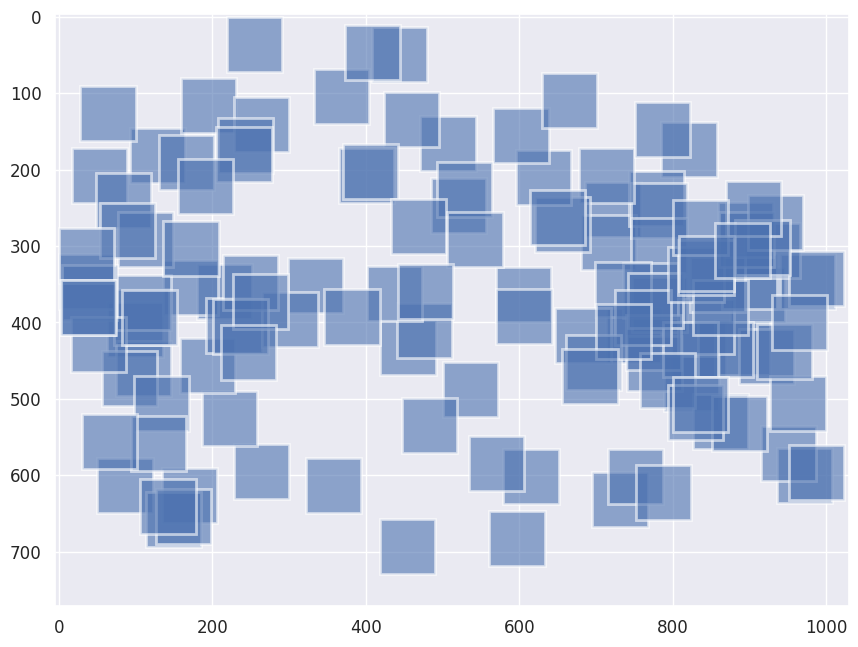

In [18]:
# todos los target boxes
target_boxes = dict()
for subj, value in subjs_response.items():
    for img, val in value.items():
        if img not in target_boxes.keys():
            target_boxes[img] = val['target_bbox'] #initial_fixation_row
target_boxes=pd.DataFrame(target_boxes).T
target_boxes.columns=['h1', 'w1', 'h2', 'w2']
target_boxes.head()

fig, ax1 = plt.subplots(1,1, figsize=(10.24,7.68))
for i, row in target_boxes.iterrows():
    ax1.add_patch(Rectangle((row.w1, row.h1), row.w2-row.w1, row.h2-row.h1, 
                           fill=True, linewidth=2, alpha=0.6))
ax1.set_xlim(-5,1024+5)
ax1.set_ylim(-3,768+3)
ax1.invert_yaxis()

134


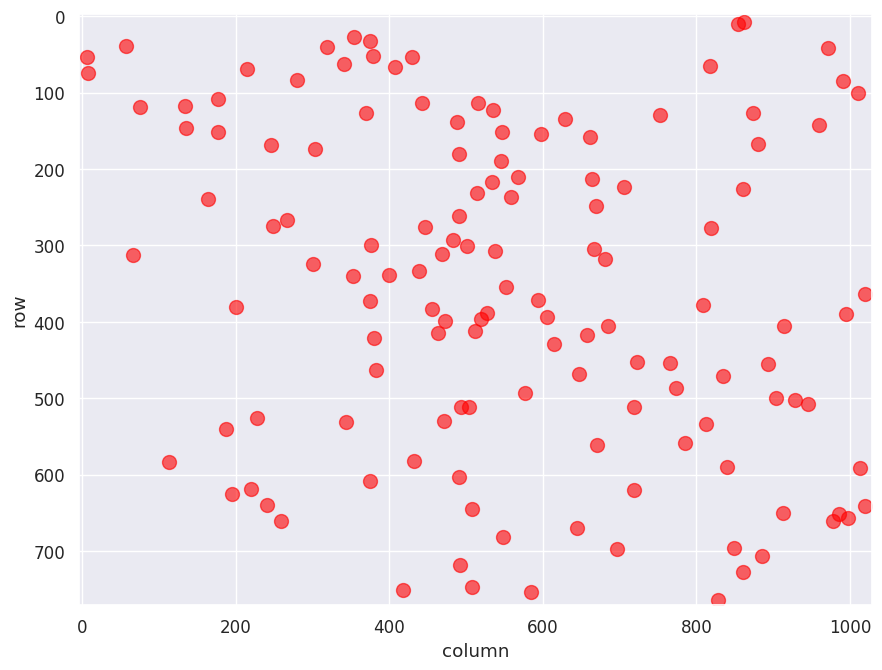

In [19]:
# todas las primeras fijaciones forzadas
first_forced_fix = dict()
for subj, value in subjs_response.items():
    for img, val in value.items():
        if img not in first_forced_fix.keys():
            first_forced_fix[img] = (val['initial_fixation_row'], val['initial_fixation_column'])  #initial_fixation_row
first_forced_fix=pd.DataFrame(first_forced_fix).T
first_forced_fix.columns=['row', 'column']
first_forced_fix.head()

fig, ax1 = plt.subplots(1,1, figsize=(10.24,7.68))
print(first_forced_fix.shape[0])
first_forced_fix.plot(x='column', y='row', ax=ax1, kind='scatter', c='red', s=100, alpha=0.6)
#f = first_forced_fix.plot.scatter(x='column', y='row', annontbackend='plotly')
#f.show()
ax1.set_xlim(-5,1024+5)
ax1.set_ylim(-3,768+3)
ax1.invert_yaxis()

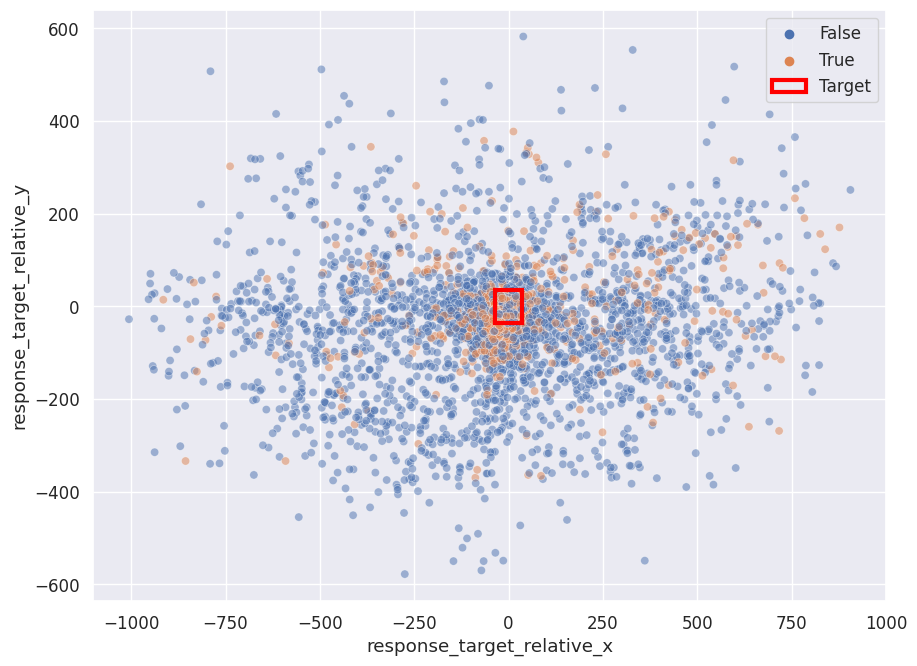

In [20]:
# Distribución de las respuestas objetivas
fig, ax = plt.subplots(1,1, figsize=(10.24, 7.68))
sns.scatterplot(x='response_target_relative_x', y='response_target_relative_y',hue='target_found',
                data=responses_data, alpha=0.5, ax=ax);
ax.add_patch(Rectangle((-36,-36), 72, 72, fill=False, edgecolor='red', linewidth=3, label='Target'))
ax.legend();

(0.0, 400.0)

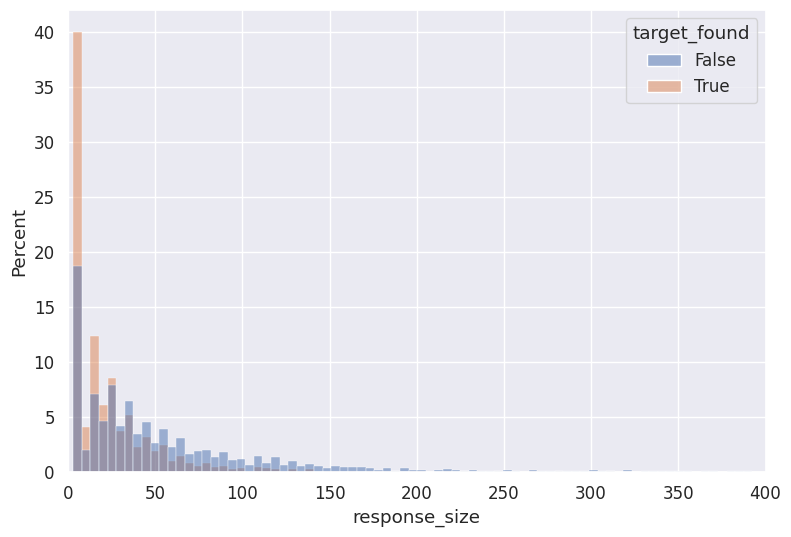

In [21]:
# Distribucion de las respuestas subjetivas
fig, ax = plt.subplots(1,1, figsize=(9,6))
sns.histplot(x='response_size', hue='target_found', data=responses_data, ax=ax, stat='percent', common_norm=False);
ax.set_xlim(0,400)

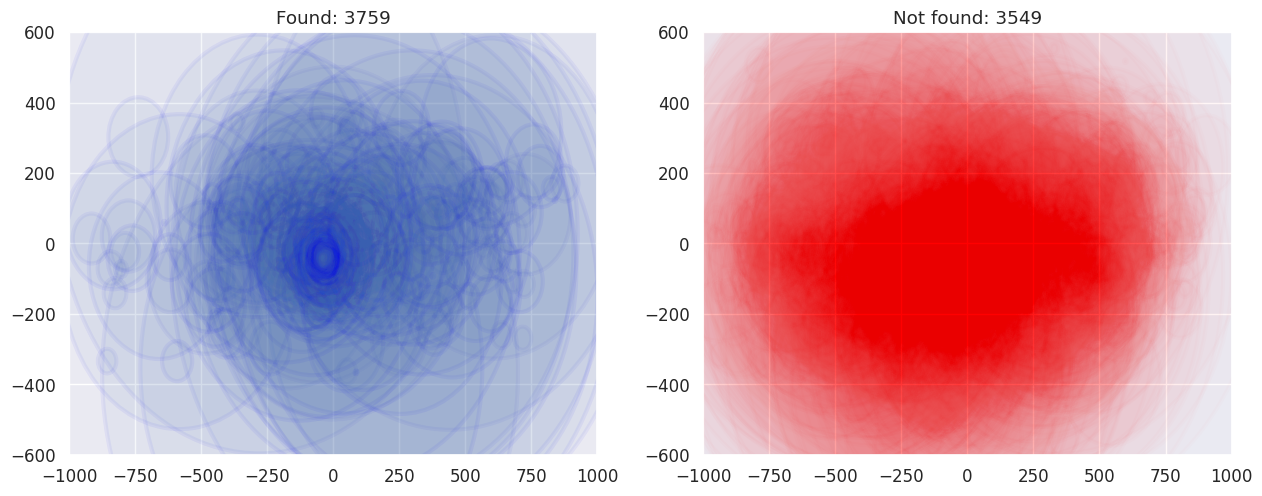

In [22]:
# all responses
if True:
    fig, ax = plt.subplots(1,2,figsize=(15,10))
    n_found , n_not_found = 0, 0
    for idx, row in responses_data.iterrows():
        rx = row.response_target_relative_x
        ry = row.response_target_relative_y
        r = row.response_size
        if row.target_found:
            ax[0].add_patch(Circle((rx,ry), r, fill=True, edgecolor='blue', linewidth=3, alpha=0.05))
            n_found += 1
        else:
            ax[1].add_patch(Circle((rx,ry), r, fill=True, facecolor='red', edgecolor='red', linewidth=3, alpha=0.01))
            n_not_found += 1
            
    ax[0].set_aspect(1024/768)
    ax[0].set_xlim(-1000, 1000)
    ax[0].set_ylim(-600, 600)
    ax[0].set_title(f'Found: {n_found}')
    ax[1].set_xlim(-1000, 1000)
    ax[1].set_ylim(-600, 600)
    ax[1].set_aspect(1024/768)
    ax[1].set_title(f'Not found: {n_not_found}')
    plt.show()

In [23]:
def add_target_patch(**kws):
    ax = plt.gca()
    ax.add_patch(Rectangle((-36,-36), 72, 72, fill=False, edgecolor='red', linewidth=3, label='Target'))

def add_amount_trials(**kws):
    ax = plt.gca()
    data = kws.pop('data')
    n = data.groupby(['target_found', 'max_fixations']).count().subj
    ax.text(f'{n}')

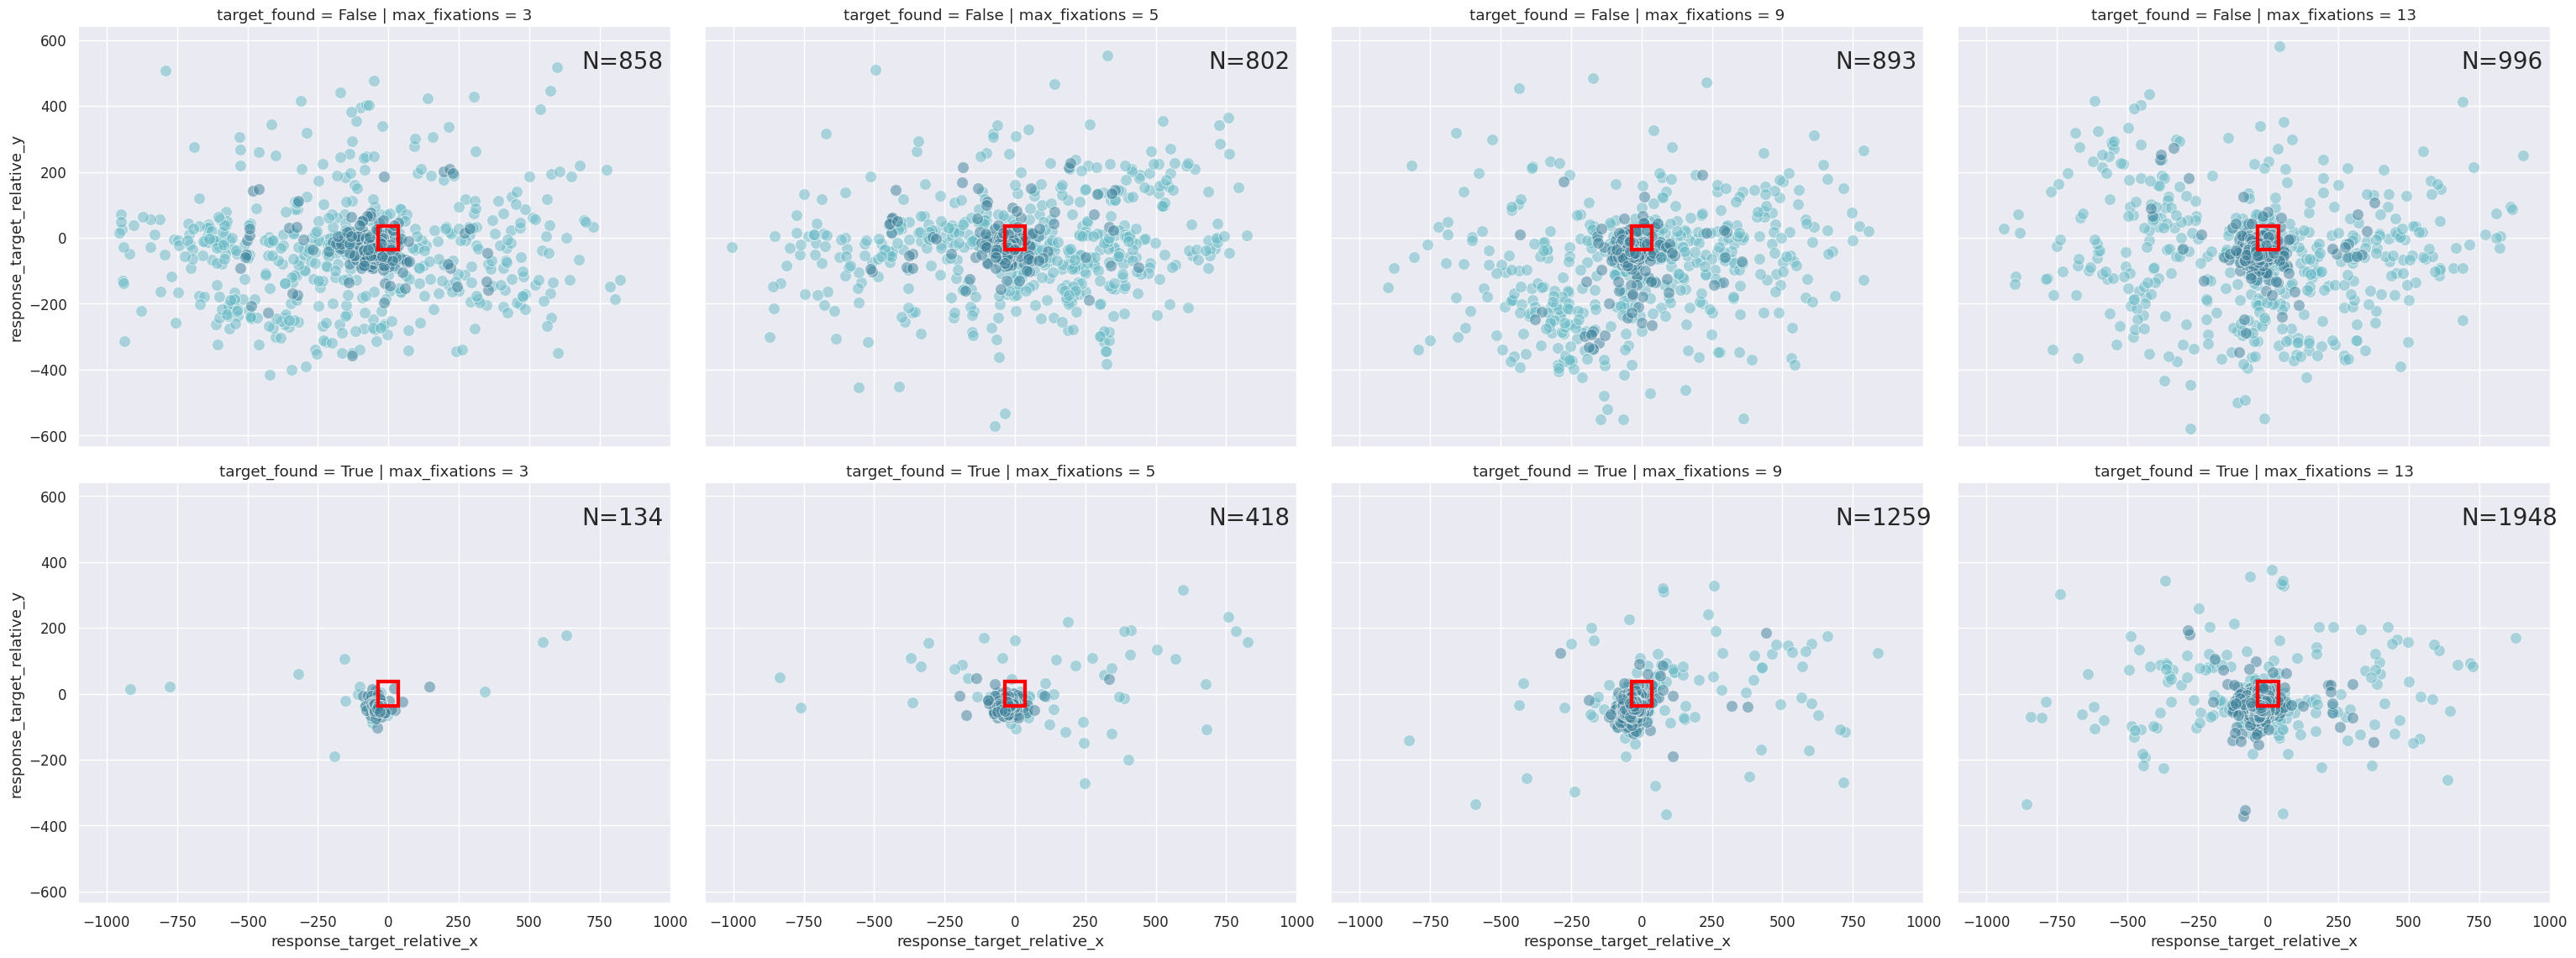

In [24]:
grid = sns.FacetGrid(responses_data, row="target_found",col="max_fixations", hue="target_found_response", 
                     palette="GnBu_d", height=5.8, aspect=1.33)

grid.map(sns.scatterplot, "response_target_relative_x", "response_target_relative_y", alpha=0.5, s=100);
grid.map_dataframe(add_target_patch)
ntrials = responses_data.groupby(['target_found', 'max_fixations']).count().subj
for ax, ((_,_), n) in zip(grid.axes.ravel(), ntrials.items()):
    ax.annotate(f'N={n}',xy=(0.85,0.9), xycoords ='axes fraction', fontsize=20)
grid.tight_layout()
plt.show()

## Distribución de fijaciones

In [25]:
# dataframe con los scanpaths
%autoreload
import mytools as tl
sdf = tl.create_scanpaths_df(subjs_response)
display(sdf.sample(5))
print(sdf.shape)

subj                             img fix_order       x      y    t  \
21140    32  grayscale_2_housebeautiful.jpg        13   839.8  500.2  314   
32407    46         grayscale_7_kitchen.jpg         2   671.0  157.2  241   
578      41           grayscale_1_oliva.jpg         2   973.2  473.3  379   
19770    24     grayscale_16_opensource.jpg         6  1023.0  632.1  272   
16369    44          grayscale_64_oliva.jpg         5   919.7  175.3  167   

       target_found  distance_to_target  
21140         False          358.493068  
32407          True           47.579828  
578           False          847.948542  
19770         False          239.237142  
16369          True          691.609268

(50659, 8)


### Todas las fijaciones

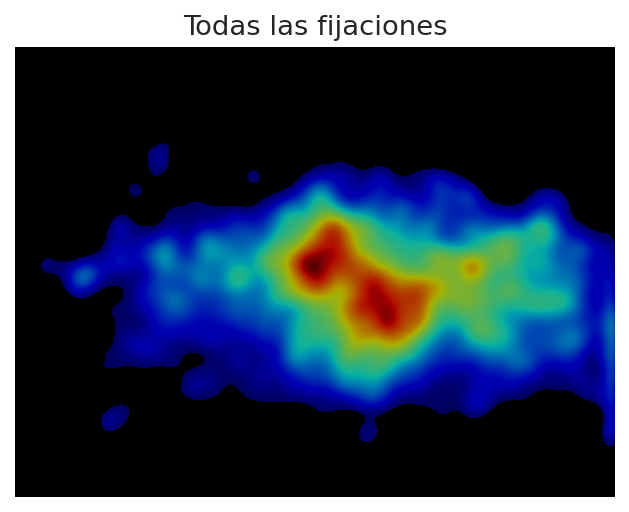

In [26]:
# heatmap de todas las fijaciones
_, hm = draw_heatmap(sdf.loc[:,['x', 'y']], alpha=0.7, title = 'Todas las fijaciones',savefigpath=figs_path)

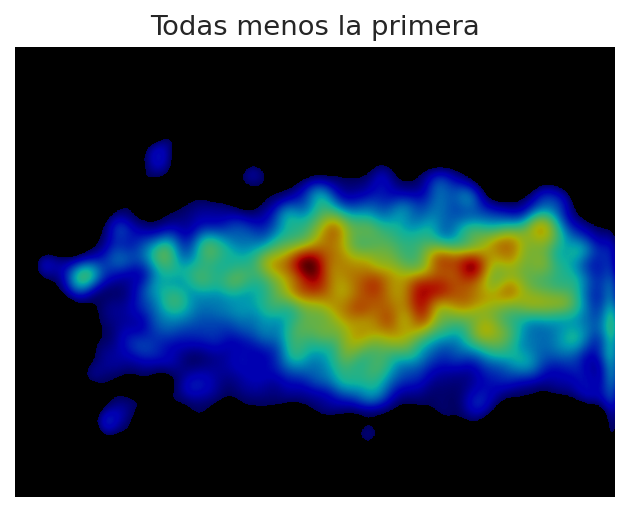

In [27]:
# heatmap de todas las fijaciones menos la primera
aux = sdf[sdf.fix_order!=0].loc[:,['x','y']]
_, hm = draw_heatmap(aux, alpha = 0.7, title = 'Todas menos la primera',savefigpath=figs_path)

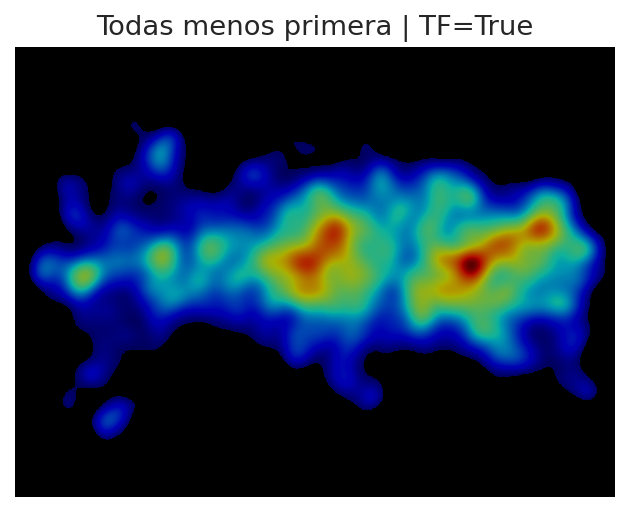

In [28]:
# heatmap de todos los target found menos la primera fijacion
aux = sdf[(sdf.target_found) & (sdf.fix_order!=0)].loc[:,['x','y']]
_, hm = draw_heatmap(aux, alpha=0.7, title='Todas menos primera | TF=True', savefigpath=None)

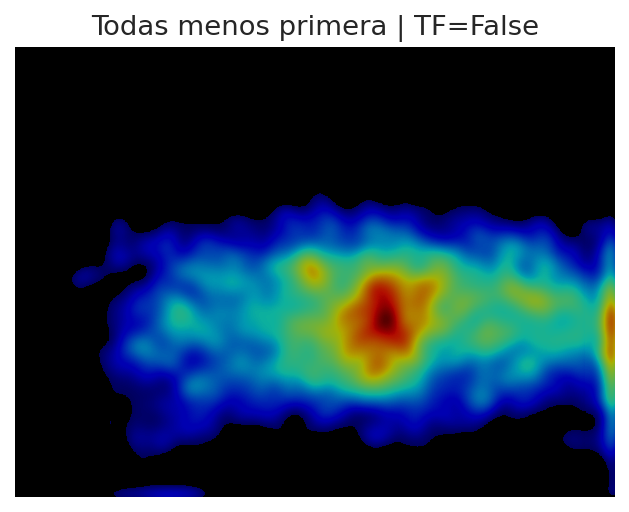

In [29]:
aux = sdf[~(sdf.target_found) & (sdf.fix_order!=0)].loc[:,['x','y']]
_, hm = draw_heatmap(aux, alpha=0.7, title='Todas menos primera | TF=False', savefigpath=figs_path)

### Todas las respuestas

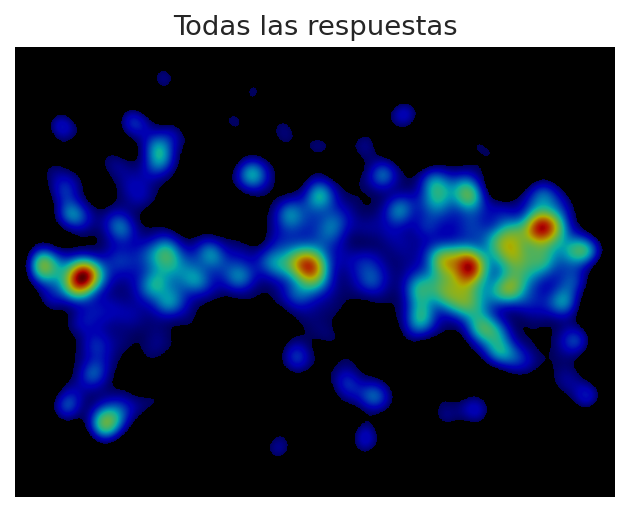

In [30]:
# distribución de las respuestas
sdf_r = tl.create_scanpaths_df(subjs_response)
aux = sdf_r[sdf_r.fix_order=='r'].loc[:,['x','y']]
_, hm = draw_heatmap(aux, alpha = 0.7, title = 'Todas las respuestas', savefigpath=figs_path)

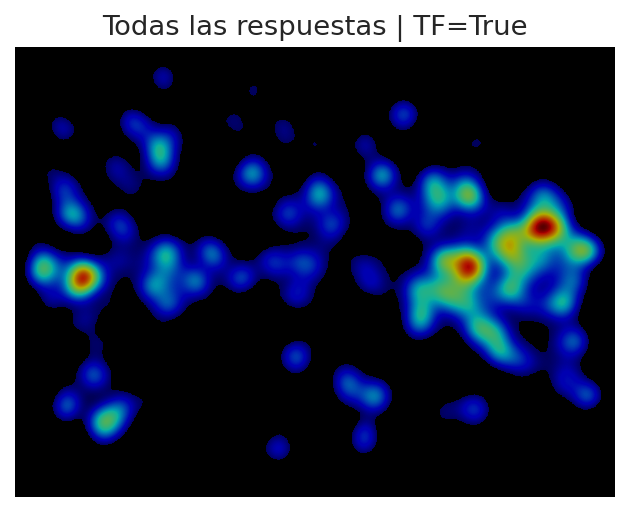

In [31]:
# todas las respuestas target found
aux = sdf_r[(sdf_r.fix_order=='r') & (sdf_r.target_found)].loc[:,['x','y']]
_, hm = draw_heatmap(aux, alpha = 0.7, title = 'Todas las respuestas | TF=True',savefigpath=figs_path)

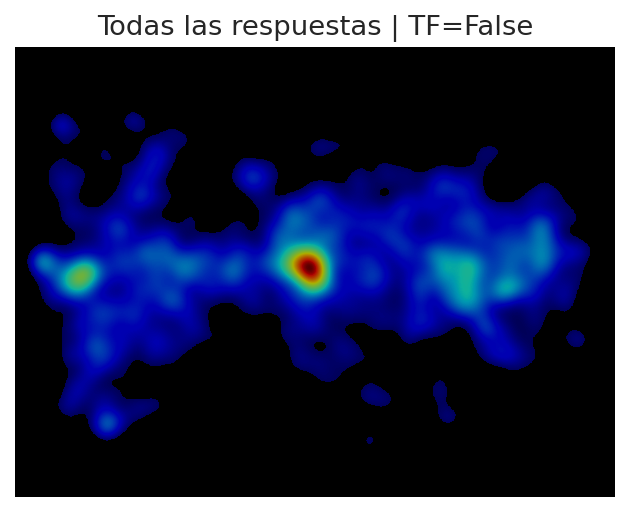

In [32]:
# todas las respuestas target not found
aux = sdf_r[(sdf_r.fix_order=='r') & ~(sdf_r.target_found)].loc[:,['x','y']]
_, hm = draw_heatmap(aux, alpha = 0.7, title = 'Todas las respuestas | TF=False',savefigpath=figs_path)

### Gráficos de trials individuales

In [33]:
# Elegimos una imagen
#image_name = 'grayscale_100_oliva.jpg' 
#image_name='grayscale_11_opensource.jpg'
image_name='grayscale_30_opensource.jpg'
# subjs[subj][image_name]['target_bbox'][:2]
# _ = tl.plot_fixposmap(subjs_response_found, image_file=image_name, 
        #    image_path = os.path.join(data_path,'images'), plot_save_path=None)
print(data_path)
print(resp_path)

../Datasets/Interiors
../Datasets/Interiors/responses


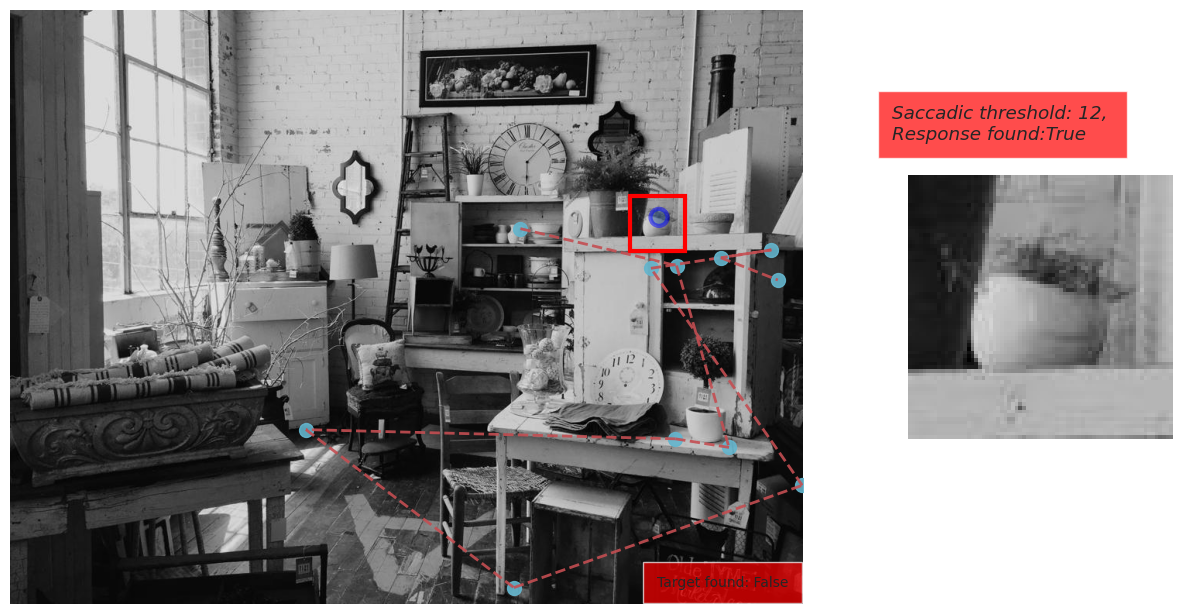

In [34]:
%autoreload
import mytools as tl
tl.plot_trial_subject_response(subj=15, 
                                image_name=image_name,
                                data_path=data_path,
                                resp_path=resp_path,
                                y_correction = False,
                                show_scanpath=True)

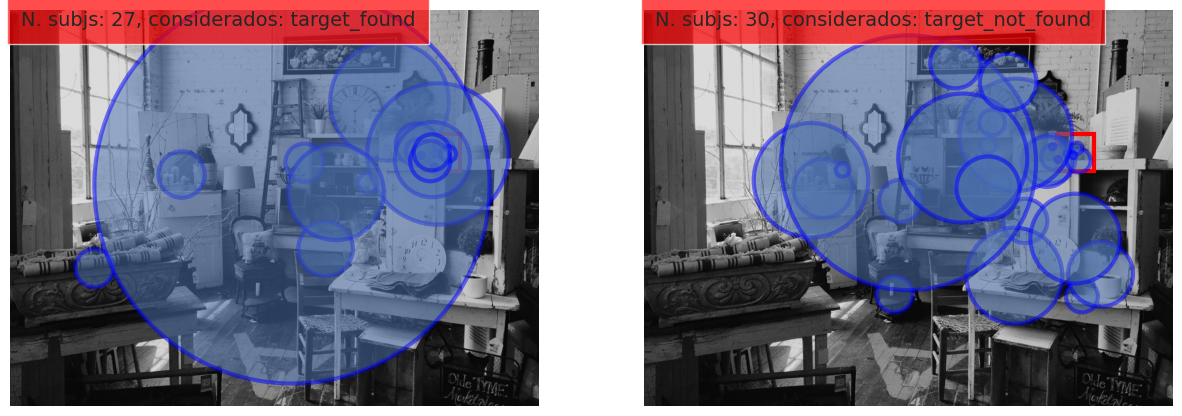

In [35]:
_,ax = plt.subplots(1,2,figsize=(15,7))

tl.plot_image_responses(image_name=image_name,
                        data_path=data_path,
                        resp_path=resp_path,
                        y_correction = False,
                        use='target_found',
                        ax=ax[0])

tl.plot_image_responses(image_name=image_name,
                        data_path=data_path,
                        resp_path=resp_path,
                        y_correction = False,
                        use='target_not_found',
                        ax=ax[1])


## Análisis de las respuestas

En esta parte la idea seria analizar como fueron las respuestas, como se agruparon, que relación tienen con los dos tipos de respuesta entre si, con la distancia al target, con el logaritmo de la distancia al target, con el hecho de haber encontrado el target.

In [36]:
#sns.set_context(context='notebook', font_scale=1.1)
# Histogramas exploratorios
#responses_data.loc[:,responses_data.columns.difference(['subj'])].hist(figsize=(16,12), bins=15);

In [187]:
def create_lineplot_subjects(
    data, column_plot="distance_response_to_target", kind="line", save_path=figs_path, error='sd', hue='target_found', ax=None
):
    """
    Creates a line plot or scatter plot of the mean of trials per subject, grouped by the maximum number of fixations and
    whether the target was found or not.

    Args:
    - data: pandas DataFrame containing the data to plot.
    - column_plot: string indicating the column to plot. Default is "distance_response_to_target".
    - kind: string indicating the type of plot to create. Must be "scatter" or "line". Default is "line".
    - save_path: string indicating the path to save the plot. Default is figs_path.
    - error: string indicating the type of error bars to plot. Must be "sd" or "ci". Default is "sd".
    - hue: string indicating the column to use for color encoding. Default is "target_found".

    Returns:
    - g: pandas DataFrame containing the mean of trials per subject, grouped by the maximum number of fixations and
    whether the target was found or not.
    """
    g = (
        data.groupby(["subj", hue, "max_fixations"])
        .mean(numeric_only=True)[column_plot]
        .reset_index()
    )

    if ax == None:
        _, ax = plt.subplots(1, 1, figsize=(9, 6))
        ax.set_title(f'Mean of trials per subject (error: {error})')
    if kind == "scatter":
        sns.stripplot(
            x="max_fixations", y=column_plot, hue=hue, data=g, ax=ax
        )
        # plt.savefig(path.join(save_path, f'scatterplot_{column_plot}.png'))
    elif kind == "line":
        sns.lineplot(
            x="max_fixations",
            y=column_plot,
            hue=hue,
            data=g,
            errorbar=error,
            ax=ax,
        )
        # plt.savefig(path.join(save_path, f'lineplot_{column_plot}.png'))
    else:
        raise ValueError('kind must be "scatter" or "line"')

    return g

def create_univariate_distribution_plots(var, bins=None, data=responses_data):
    # Primer plot
    palette = sns.color_palette("tab10", 4)
    _, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    if bins == None:
        bins_pixels = np.arange(0, 1280, 32)  # 1280 = np.sqrt(1024**2 + 768**2)
    else:
        bins_pixels = bins
    if var == "delta_time_response":
        bins_pixels = np.linspace(0, 80, 30)

    sns.histplot(
        x=var,
        hue="max_fixations",
        data=data[data.target_found],
        bins=bins_pixels,
        palette=palette,
        ax=ax[0],
        stat="percent",
        common_norm=False,
    )
    sns.histplot(
        x=var,
        hue="max_fixations",
        data=data[~data.target_found],
        bins=bins_pixels,
        palette=palette,
        ax=ax[1],
        stat="percent",
        common_norm=False,
    )
    ax[0].set_title("Target found")
    ax[1].set_title("Target not found")
    plt.show()

    # Segundo plot
    g = sns.catplot(
        data=data,
        x="target_found",
        y=var,
        col="max_fixations",
        kind="box",
        height=4.8,
        aspect=0.65,
    )
    plt.show()

    # Tercer plot
    grid = sns.FacetGrid(
        data,
        col="max_fixations",
        row="target_found",
        palette="GnBu_d",
        height=5.2,
        aspect=1.33,
    )
    bins_hist = np.linspace(0, 1000, 20)
    grid.map(
        sns.histplot,
        var,
        stat="percent",
        alpha=0.8,
        common_norm=False,
        bins=bins_pixels,
    )
    grid.tight_layout()
    plt.show()
    # plt.savefig(os.path.join(figs_path, f'grid_{var}.png'))

    # Cuarto plot: curva de fix rank
    _, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
    sns.lineplot(
        x="max_fixations",
        y=var,
        hue="target_found",
        data=responses_data,
        ax=ax[0]
    )

    sns.lineplot(
        x="max_fixations",
        y=var,
        hue="target_found_response",
        data=responses_data,
        ax=ax[1],
    )
    
    # Quinto plot: curva de fix rank pero agrupado por sujetos
    _, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
    _ = create_lineplot_subjects(data=data, column_plot=var, ax=ax[0])
    _ = create_lineplot_subjects(data=data, column_plot=var, hue='target_found_response', ax=ax[1])
    ax[0].set_title(f'Mean of trials per subject (error: sd)')
    plt.tight_layout()
    plt.show()
    

### Respuesta objetiva

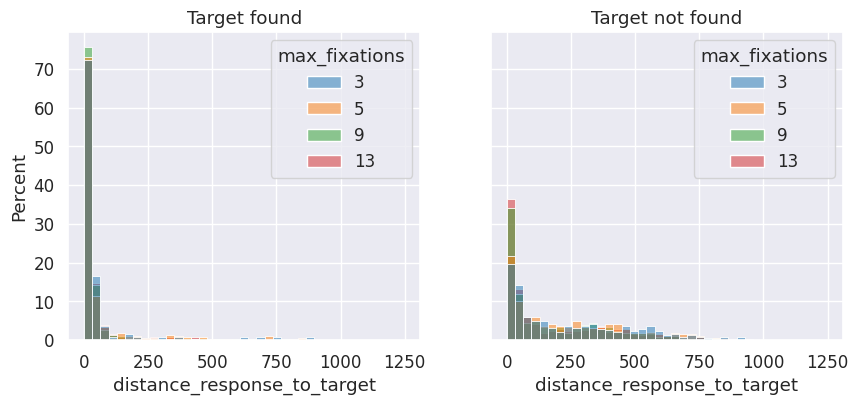

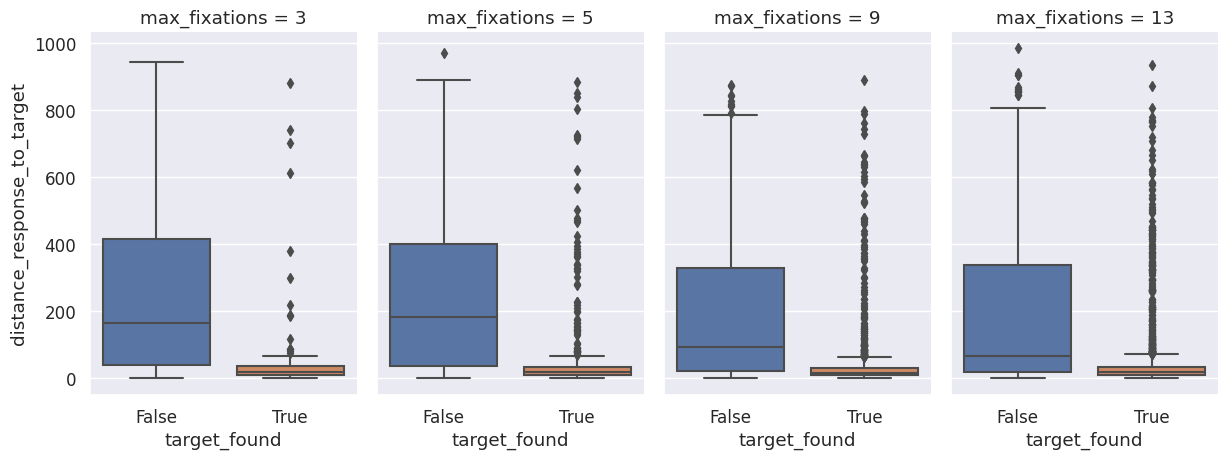

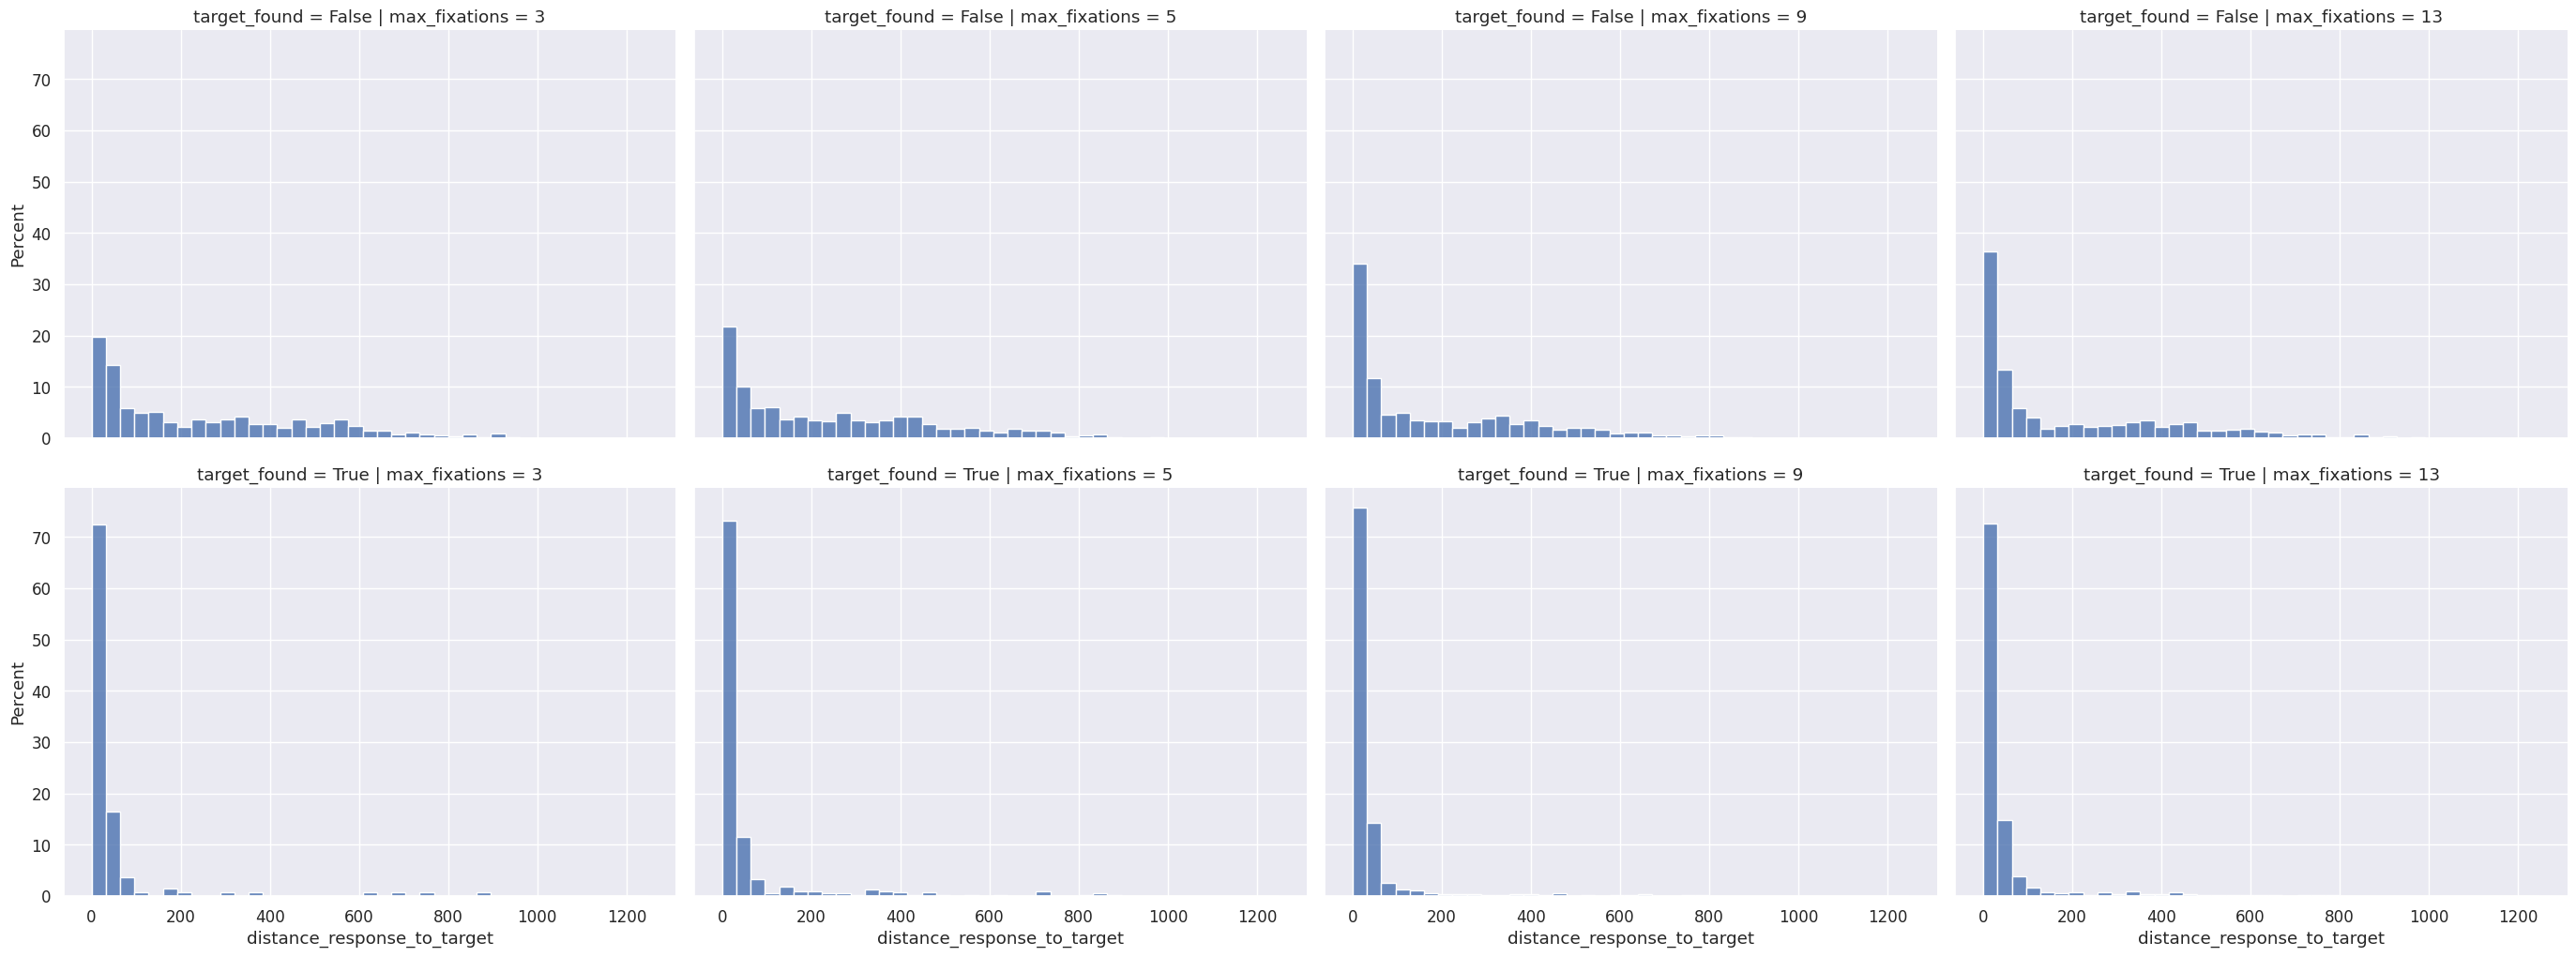

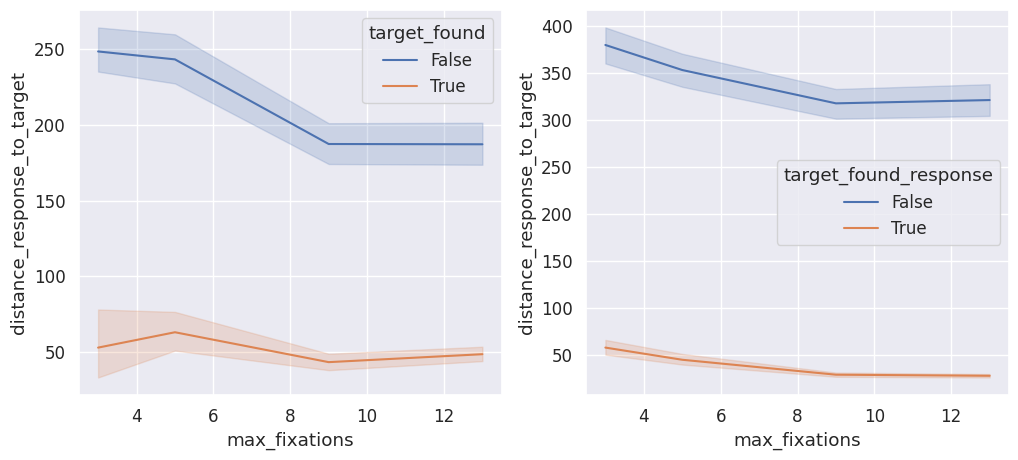

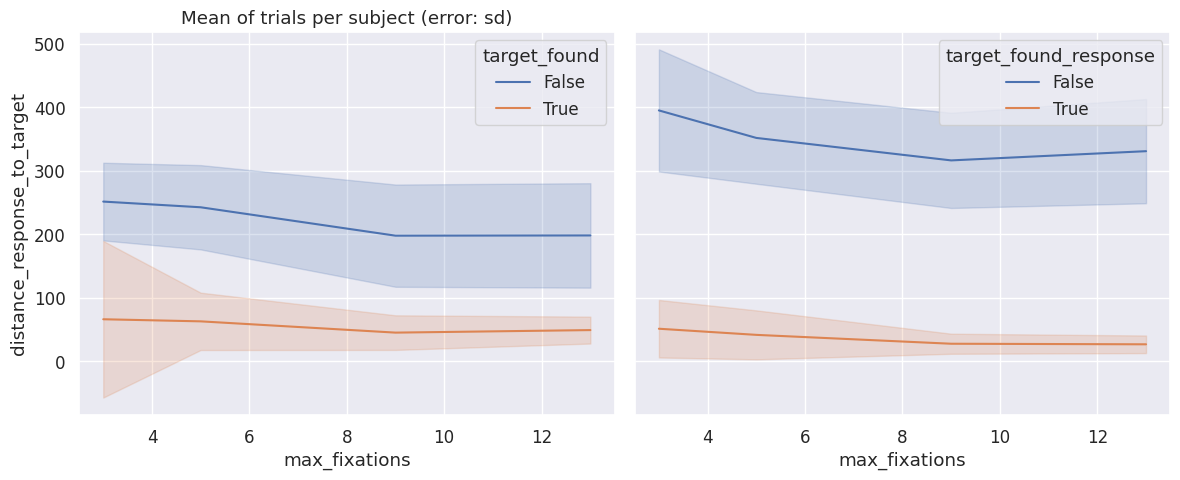

In [188]:
var= 'distance_response_to_target'
create_univariate_distribution_plots(var)

### Respuesta objetiva - last fix

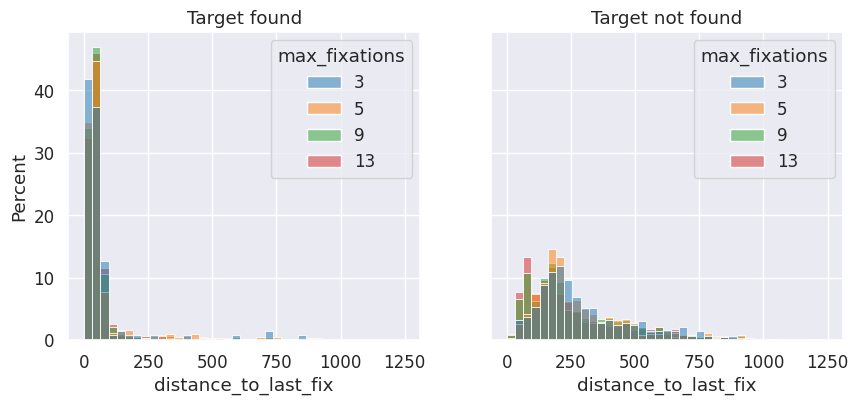

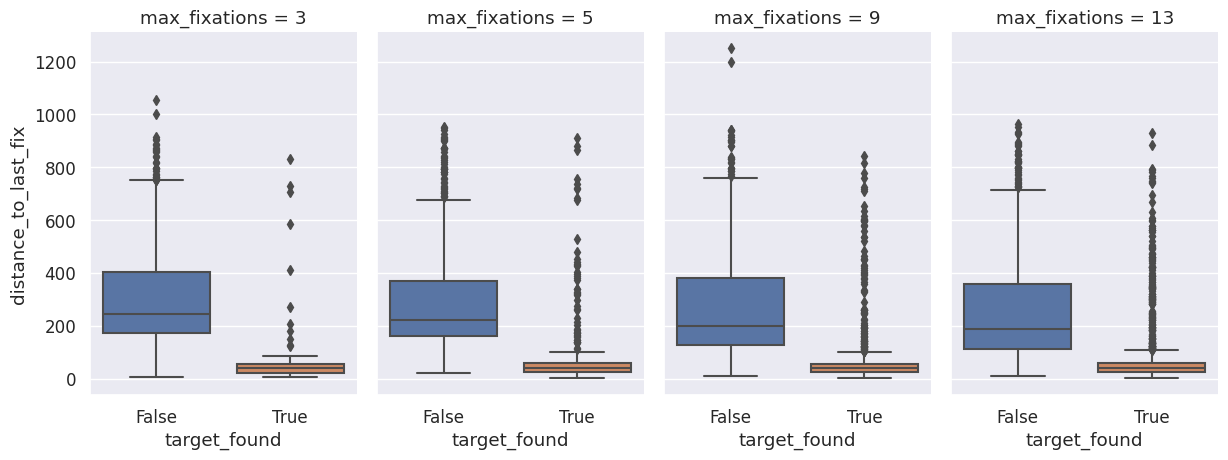

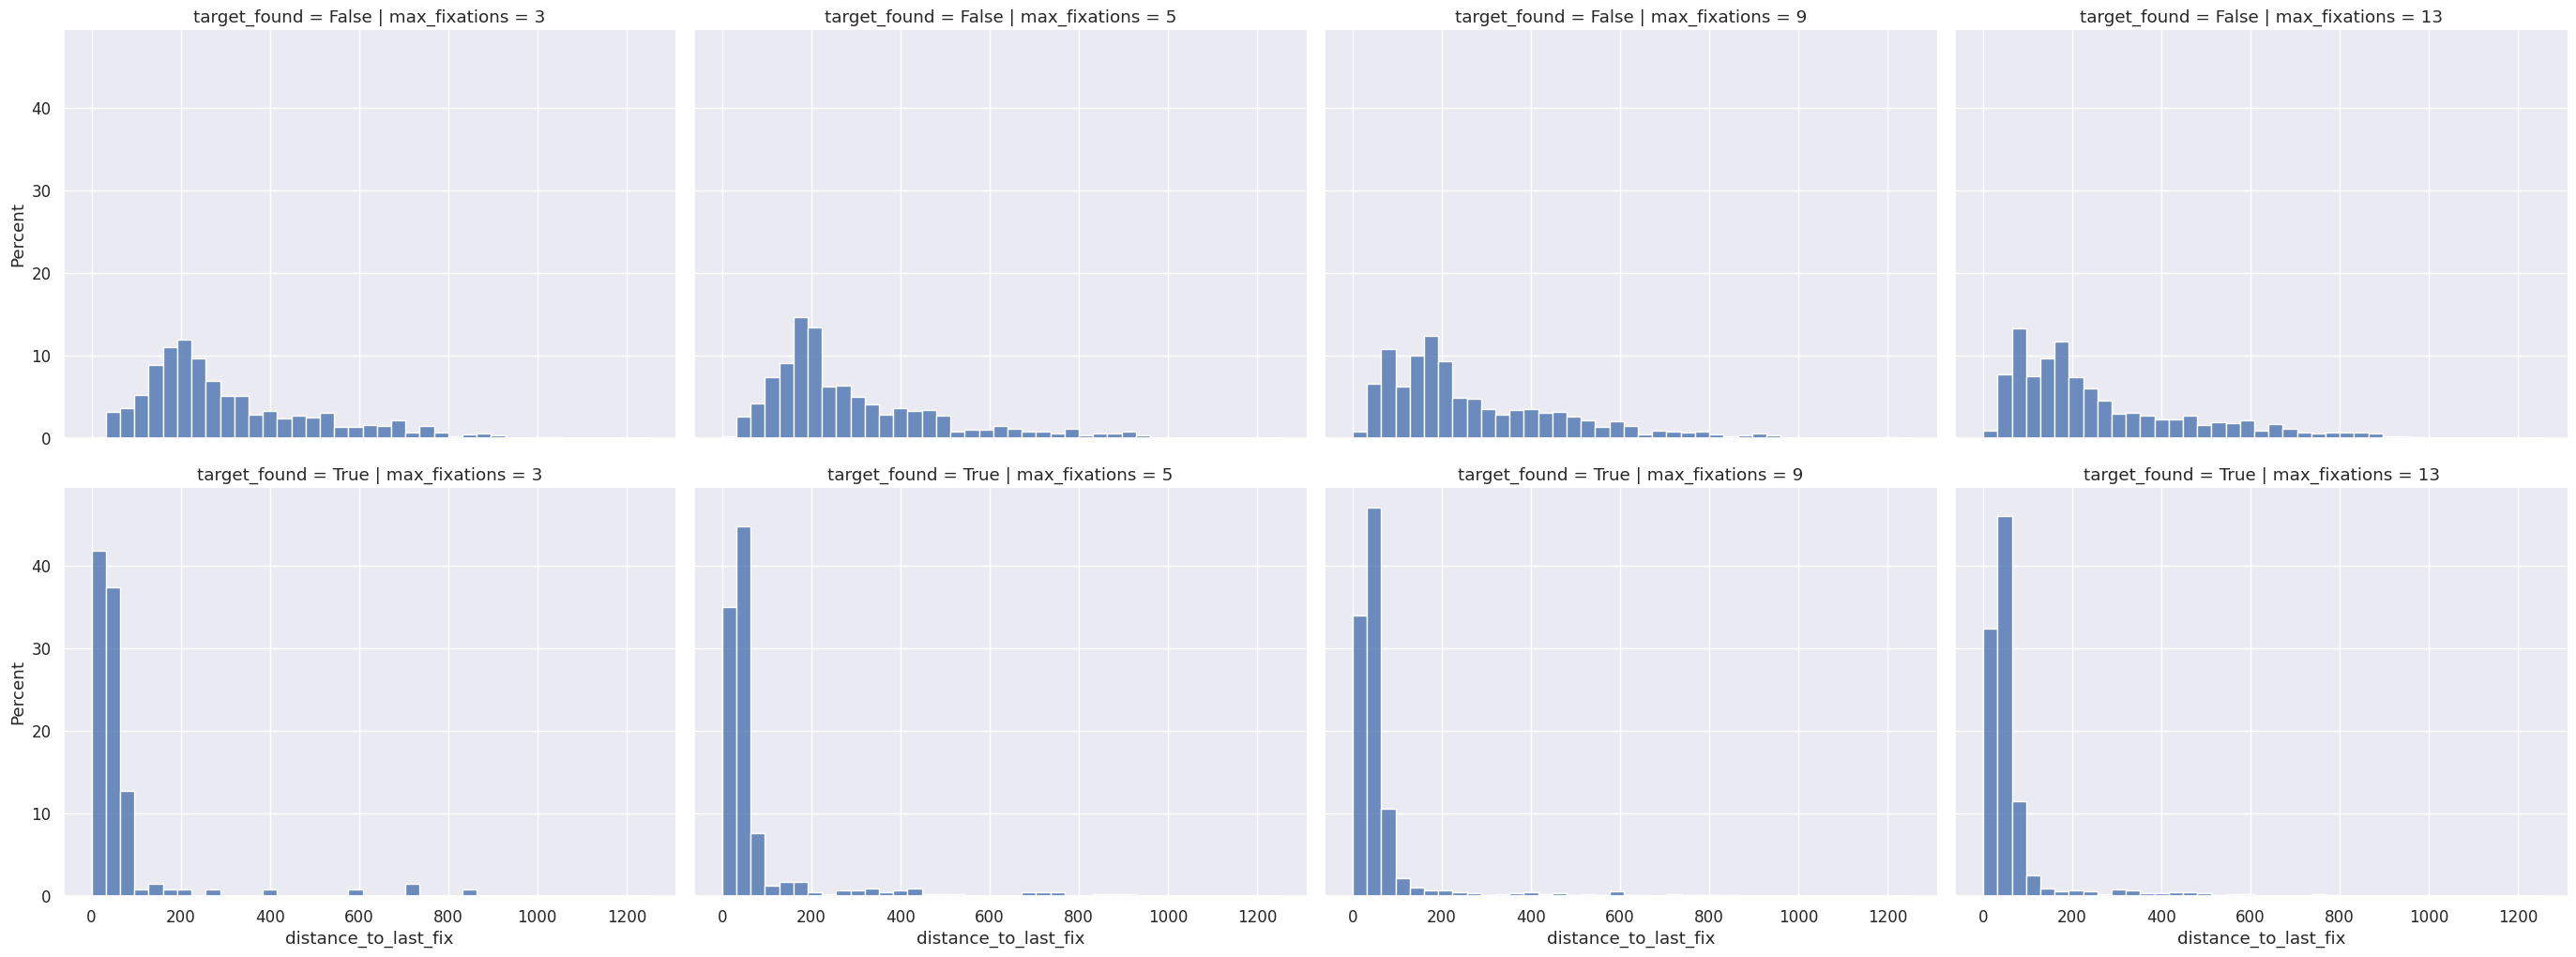

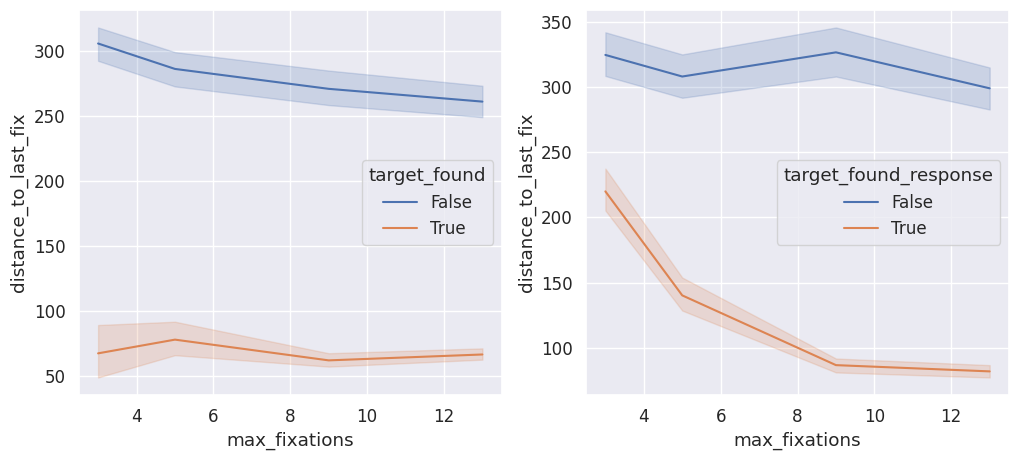

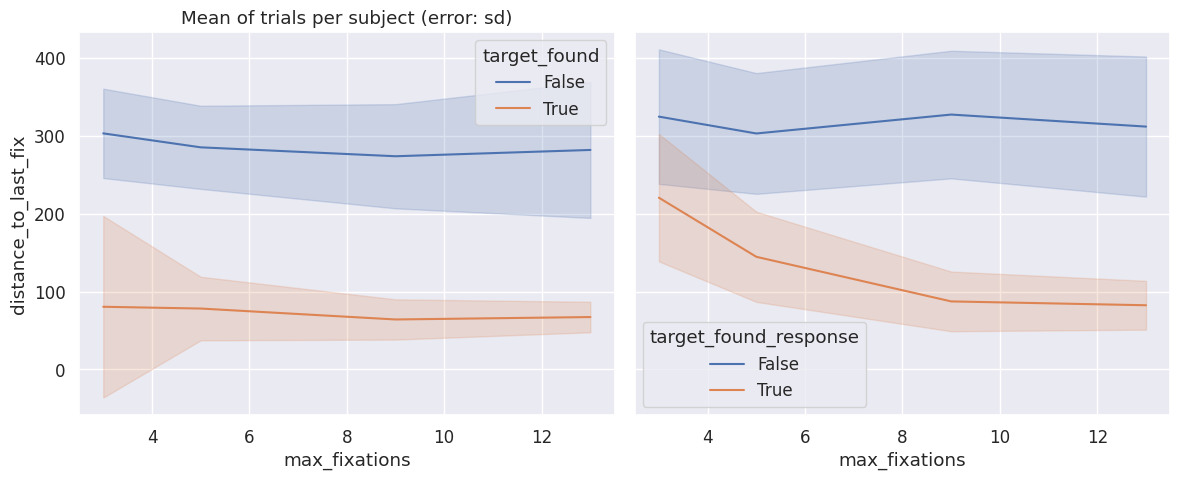

In [189]:
var = 'distance_to_last_fix'
create_univariate_distribution_plots(var)

### Respuesta subjetiva

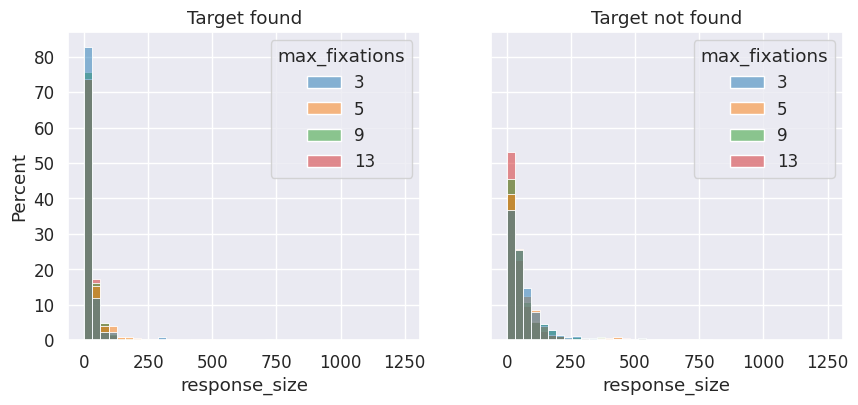

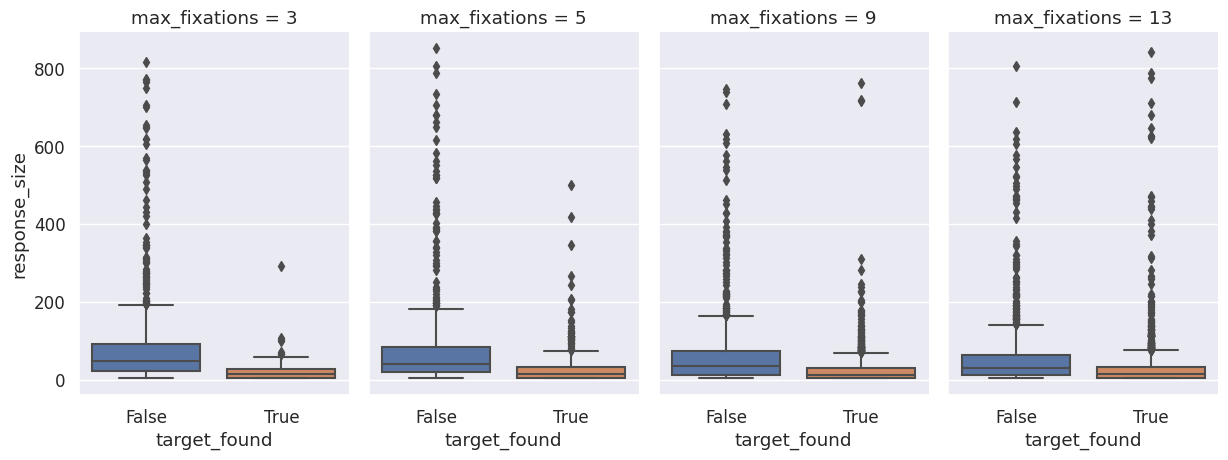

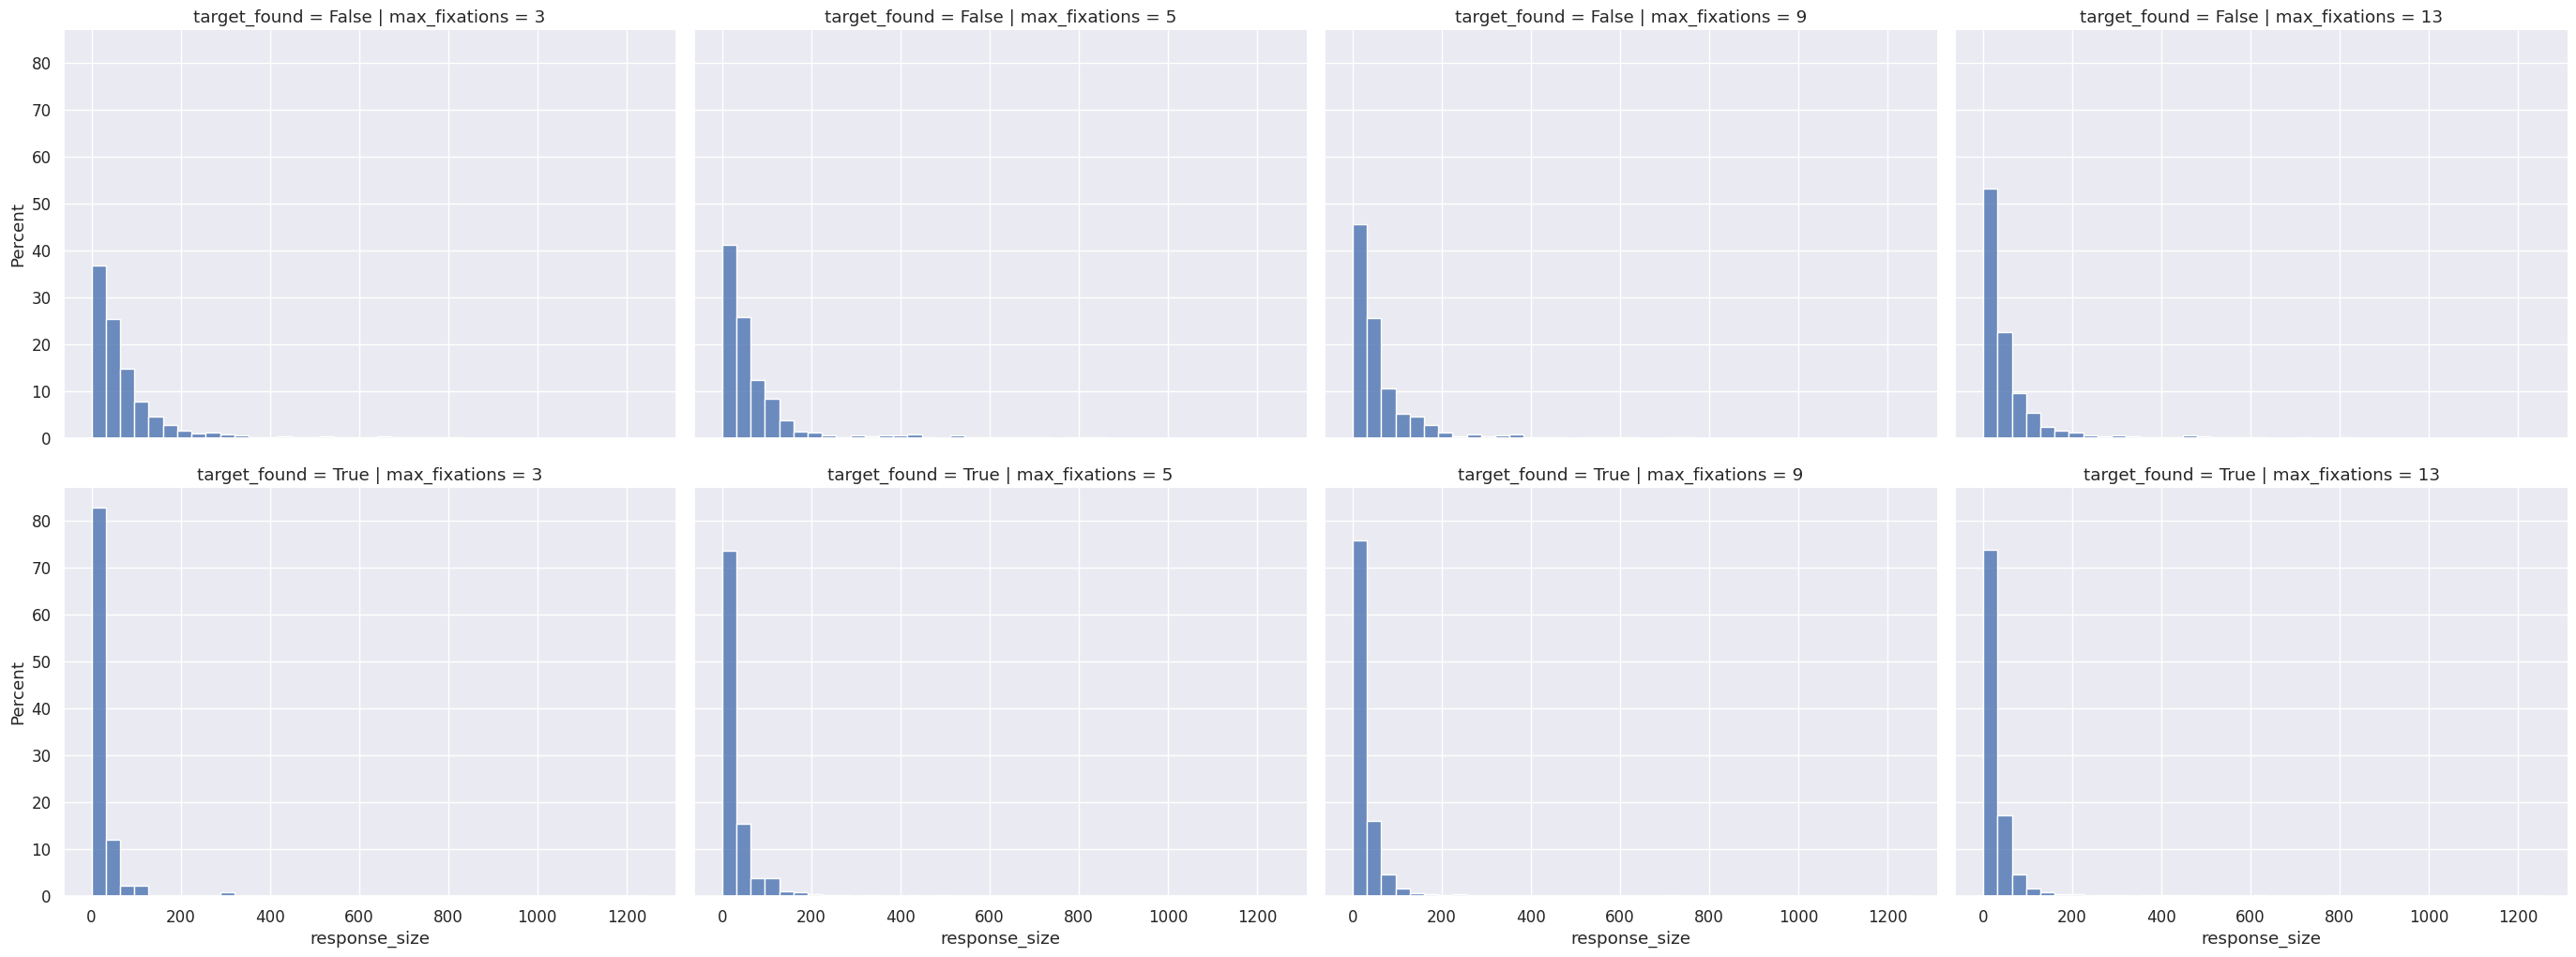

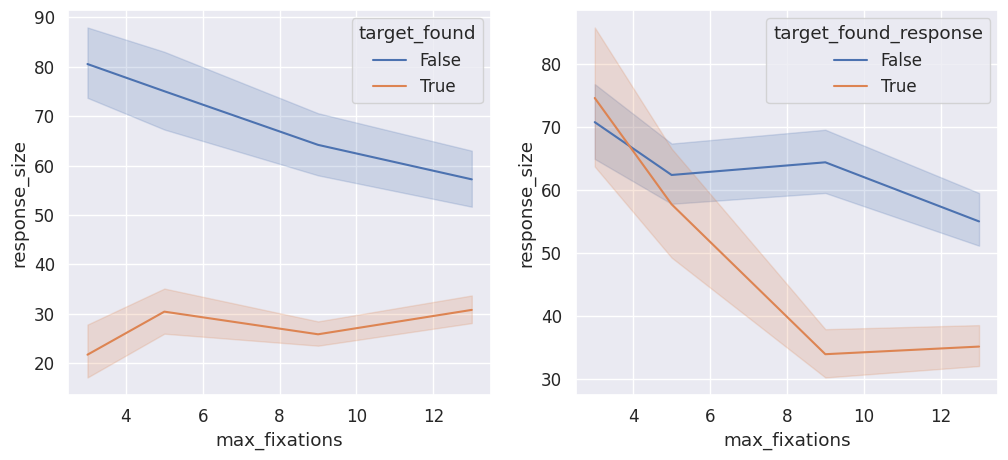

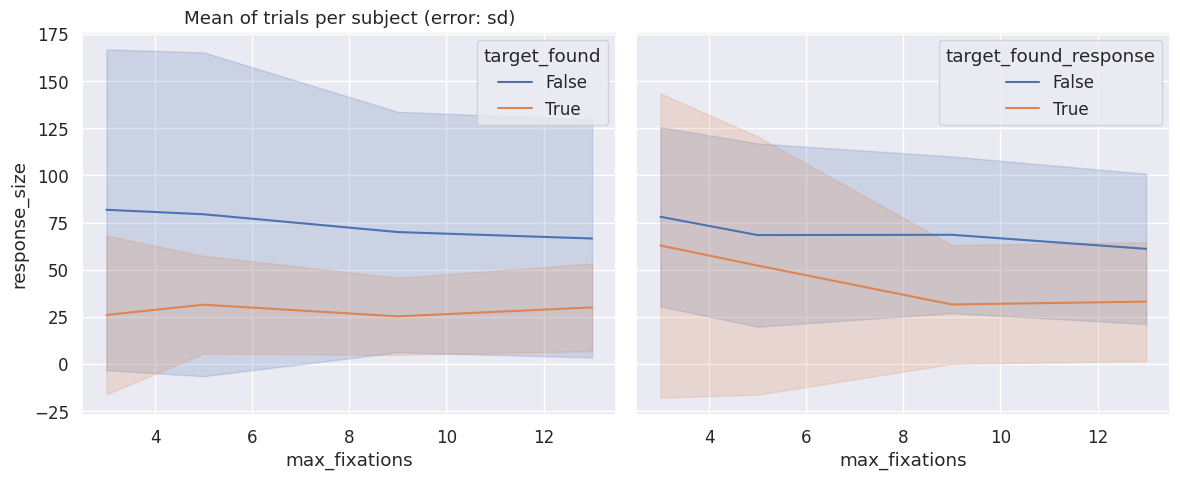

In [190]:
var = 'response_size'
create_univariate_distribution_plots(var)

### Tiempo entre respuestas

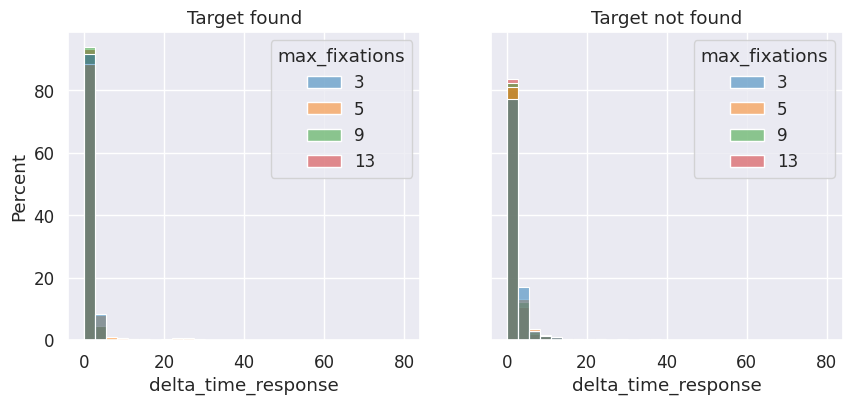

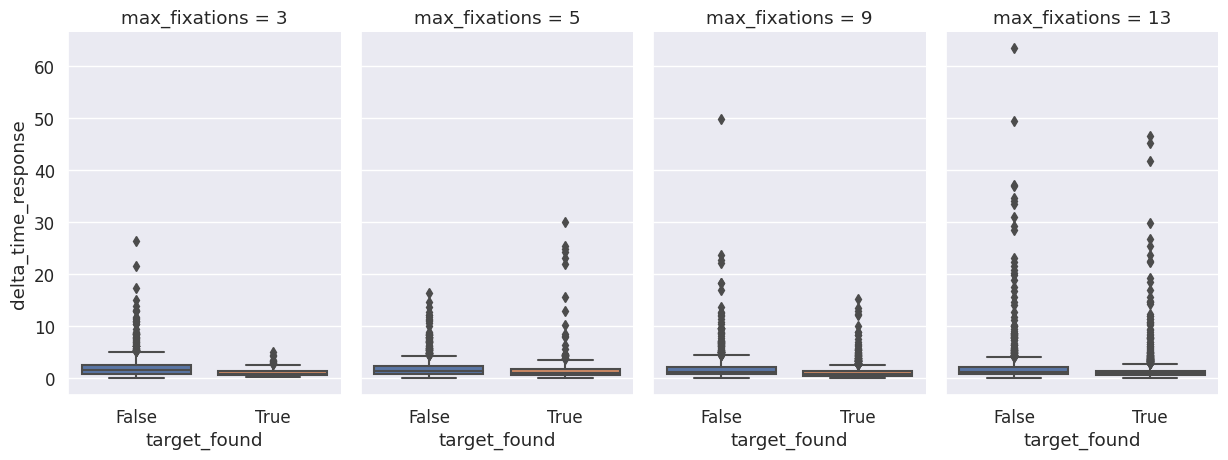

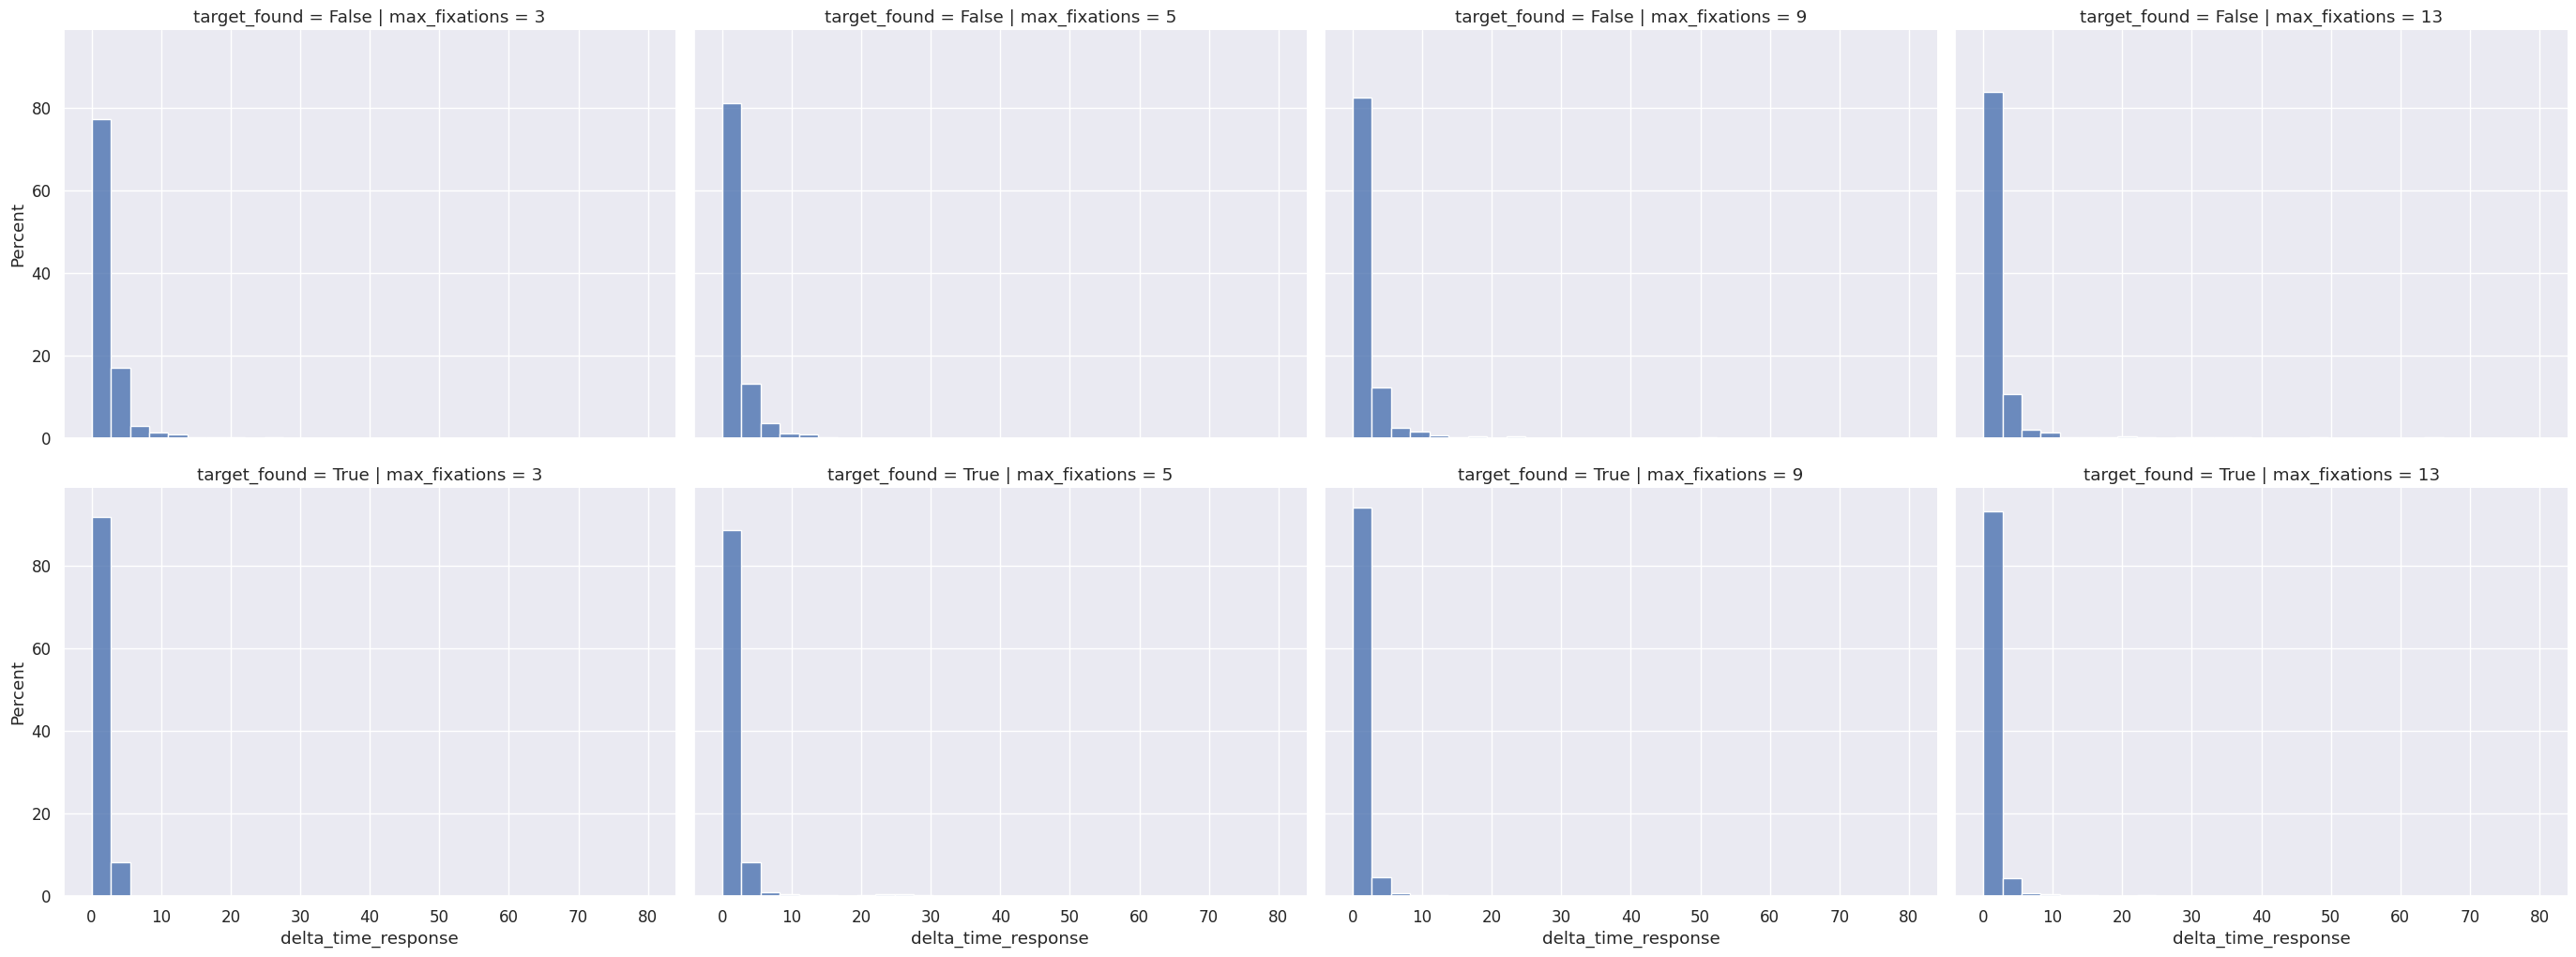

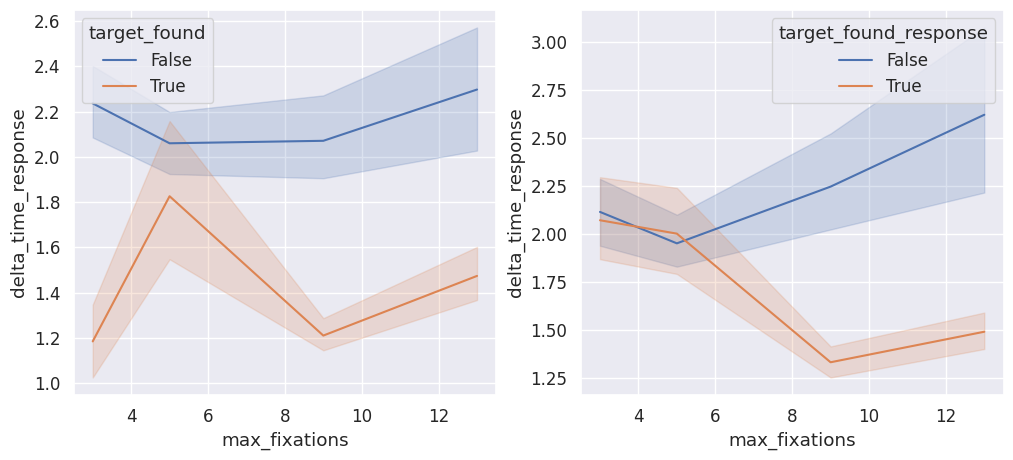

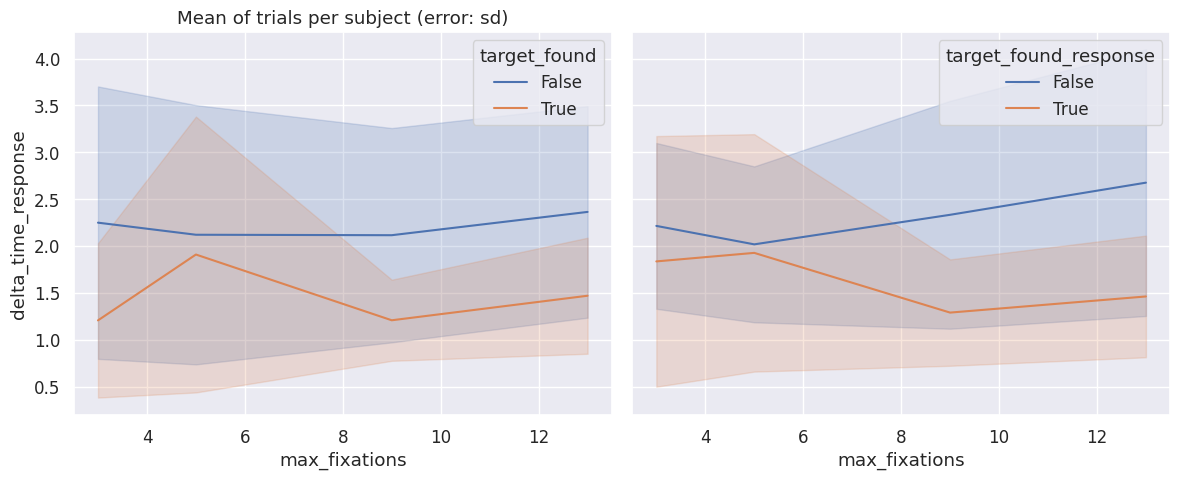

In [191]:
var = 'delta_time_response'
create_univariate_distribution_plots(var)

### Observaciones

Por ahora consideramos la distribución de las siguientes variables:
- `distance_response_to_target`
- `distance_response_to_last_fix`
- `response_size`
- `delta_time_response`

Analizamos su distribución de acuerdo a dos factores:
- `target_found`
- `fix_rank` o número de sacada o agrupamiento de threshold de sacada
- `target_found_response` (de acuerdo a si lo encontraron o no en respuesta, distancia al centro menor a 32 px. mas el tamaño de la respuesta)


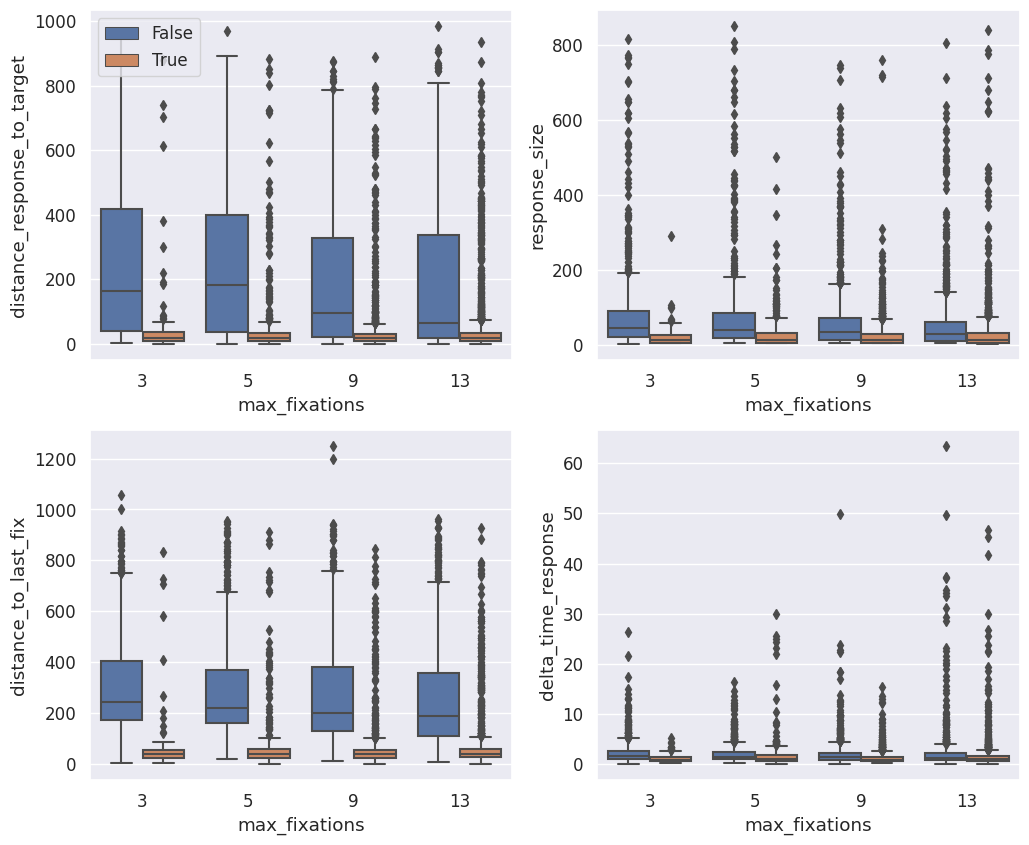

In [139]:
_, ax = plt.subplots(2, 2, sharey=False, figsize=(12, 10))

sns.boxplot(
    x="max_fixations",
    y="distance_response_to_target",
    hue="target_found",
    data=responses_data,
    ax=ax[0,0],
)
ax[0,0].legend(loc='upper left')

sns.boxplot(
    x="max_fixations",
    y="response_size",
    hue="target_found",
    data=responses_data,
    ax=ax[0,1],
)
ax[0,1].legend_.remove()

sns.boxplot(
    x="max_fixations",
    y="distance_to_last_fix",
    hue="target_found",
    data=responses_data,
    ax=ax[1,0],
)
ax[1,0].legend_.remove()

sns.boxplot(
    x="max_fixations",
    y="delta_time_response",
    hue="target_found",
    data=responses_data,
    ax=ax[1,1],
)
ax[1,1].legend_.remove()

plt.show()

## Análisis de respuestas (log)

In [49]:
responses_data['delta_time_response_log']  = np.log(responses_data['delta_time_response'])
responses_data['distance_response_to_target_log']   = np.log(responses_data['distance_response_to_target'])
responses_data['distance_to_last_fix_log'] = np.log(responses_data['distance_to_last_fix'])
responses_data['response_size_log']        = np.log(responses_data['response_size'])
responses_data.head()

/home/gastonb/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


subj                              img  max_fixations  scanpath_length  \
0    41      grayscale_11_opensource.jpg             13               10   
1    41  grayscale_18_housebeautiful.jpg              9               10   
2    41          grayscale_100_oliva.jpg              5                3   
3    41           grayscale_17_oliva.jpg              3                2   
4    41  grayscale_16_housebeautiful.jpg              3                4   

   target_found  target_found_response  response_size  \
0         False                  False             29   
1         False                  False             47   
2          True                  False             19   
3         False                  False             35   
4         False                  False             19   

   distance_response_to_target  distance_to_last_fix  delta_time_response  \
0                   266.810794            213.164661            49.599536   
1                   329.200547            411.615026             9.666707   
2                   202.054448            204.544005             5.633140   
3                   297.692795            208.923431             4.266648   
4                   568.198029            223.650531             2.900187   

   response_x  response_y  target_bbox_x  target_bbox_y  \
0       486.0       447.0            228            559   
1       520.0       538.0            797            400   
2       714.0       218.0            713            381   
3       433.0       316.0            186            490   
4       762.0       442.0            158            421   

   response_target_relative_x  response_target_relative_y  \
0                      -258.0                       112.0   
1                       277.0                      -138.0   
2                        -1.0                       163.0   
3                      -247.0                       174.0   
4                      -604.0                       -21.0   

   delta_time_response_log  distance_response_to_target_log  \
0                 3.903981                         5.586540   
1                 2.268688                         5.796667   
2                 1.728667                         5.308537   
3                 1.450829                         5.696062   
4                 1.064775                         6.342470   

   distance_to_last_fix_log  response_size_log  
0                  5.362065           3.367296  
1                  6.020089           3.850148  
2                  5.320783           2.944439  
3                  5.341968           3.555348  
4                  5.410085           2.944439

In [193]:
# chequeo de infs
print(responses_data['distance_response_to_target_log'].min())
mymask = [responses_data['distance_response_to_target_log'] == -np.inf]
print('Cantidad de menos infinito: {}'.format(responses_data[responses_data['distance_response_to_target_log'] == -np.inf].shape[0]))
(responses_data==-np.inf).sum()
# reemplazo esos valores
responses_data.replace(-np.inf, 0, inplace=True)
#(responses_data==-np.inf).sum()

0.0
Cantidad de menos infinito: 0


In [52]:
# el tamaño minimo de la respuesta parece ser de 3 pixeles
aux_min_response = np.exp(responses_data['response_size_log'].min())
print(f'Minimo tamaño de respuesta: {aux_min_response:0.02f}')

Minimo tamaño de respuesta: 3.00


### Respuesta objetiva

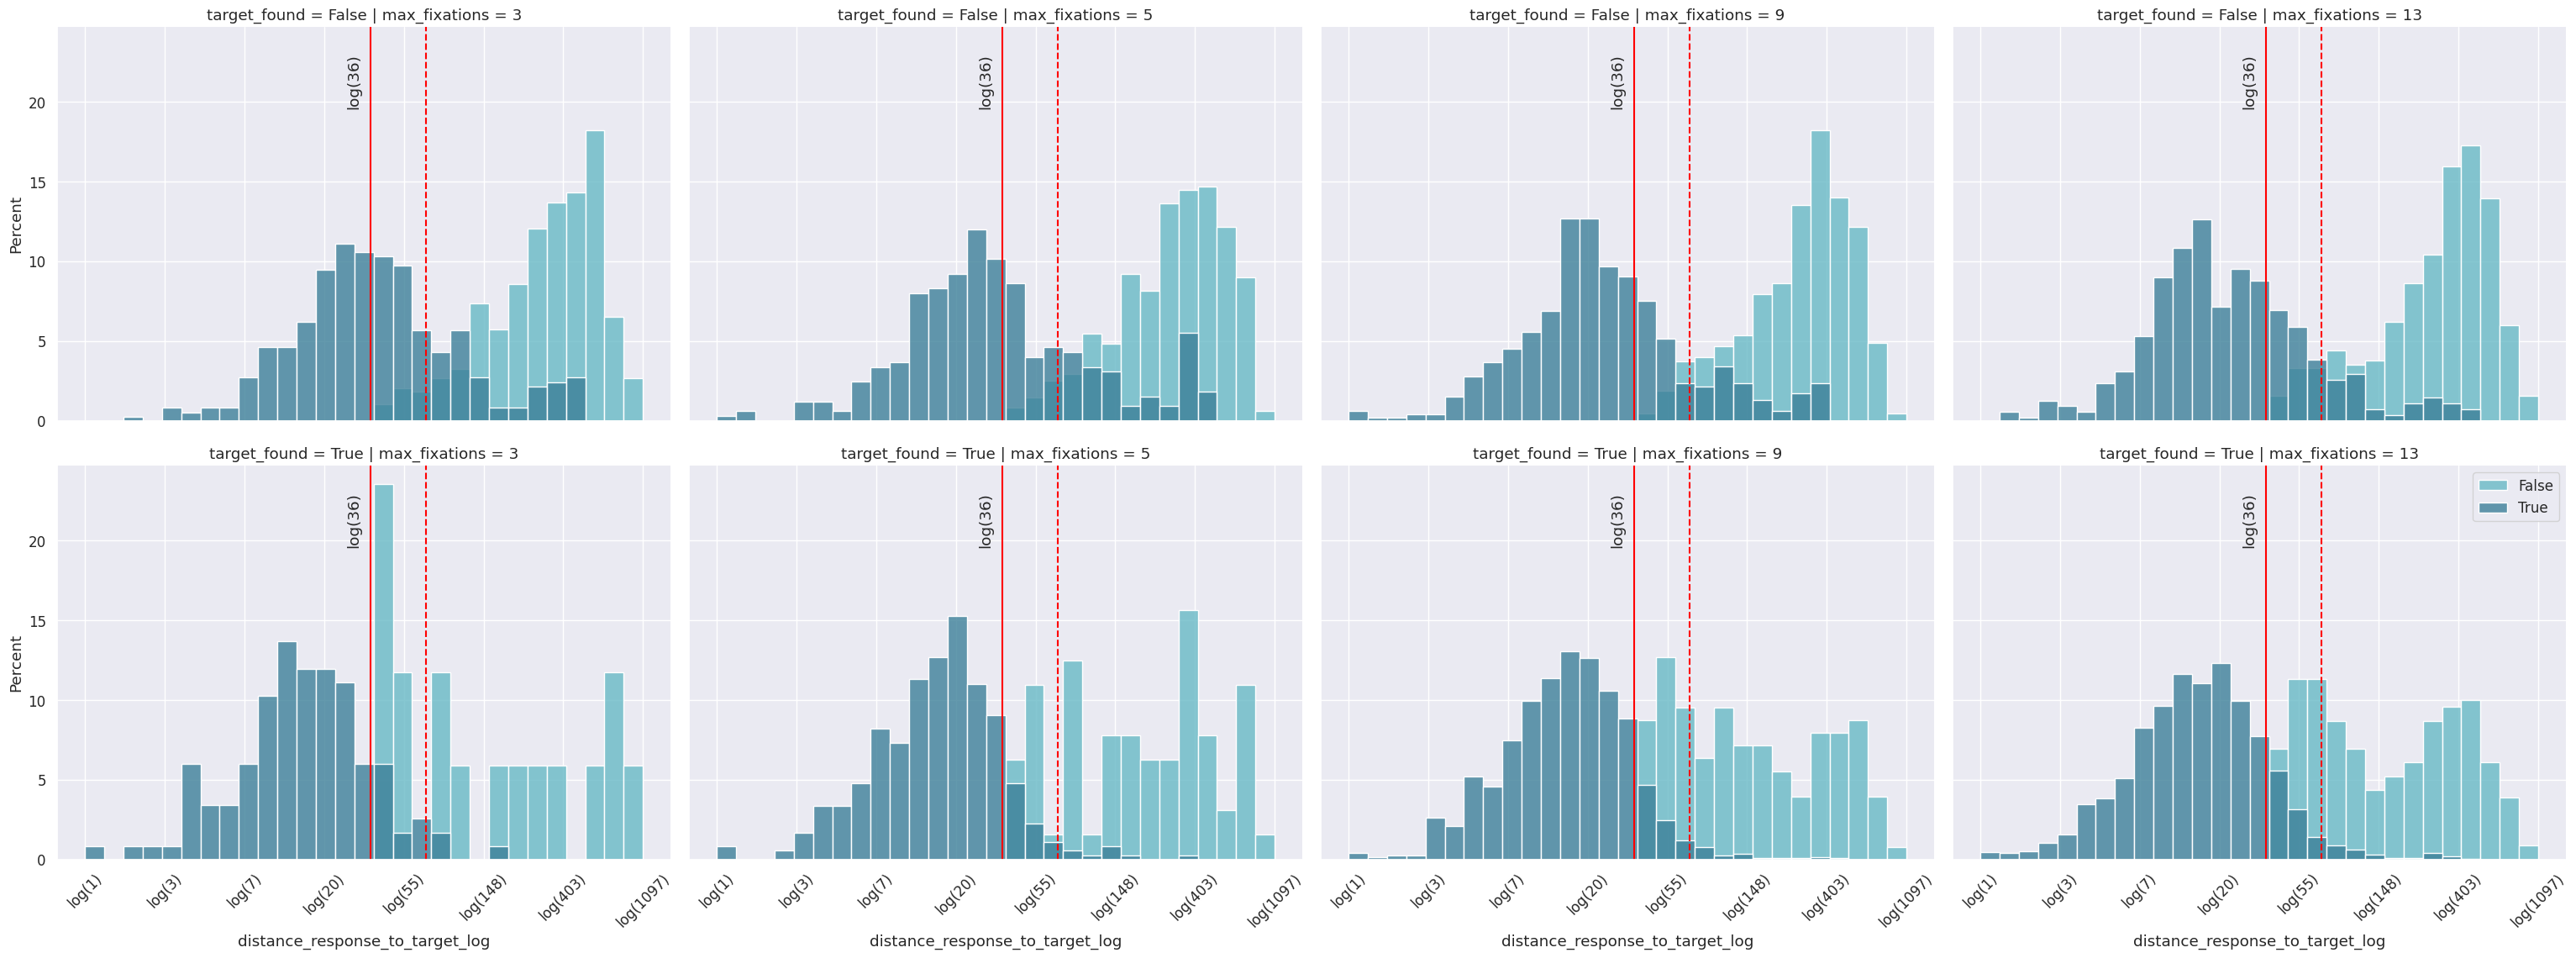

In [207]:
# distance_response_to_target_log
var = "distance_response_to_target_log"
grid = sns.FacetGrid(responses_data, col="max_fixations", row='target_found', hue='target_found_response',
                    palette="GnBu_d", height=5.8, aspect=1.33)

bins_hist = np.linspace(0,7,30)
grid.map(sns.histplot, var,bins=bins_hist, stat='percent', alpha=0.8, common_norm=False);
for i, ax in enumerate(grid.axes.ravel()):
    ax.axvline(np.log(36),color='red')
    ax.axvline(np.log(72),color='red',ls='--')
    trans = ax.get_xaxis_transform()
    ax.text(np.log(36)-0.3, .8, 'log(36)', transform=trans, rotation=90)
    if i > 3:
        ax.set_xticks(range(8))
        ax.set_xticklabels([f'log({np.exp(x):.0f})' for x in range(8)], rotation=45)
            
grid.tight_layout()
plt.legend()
plt.show()
# plt.savefig(os.path.join(figs_path, f'grid_{var}.png'))

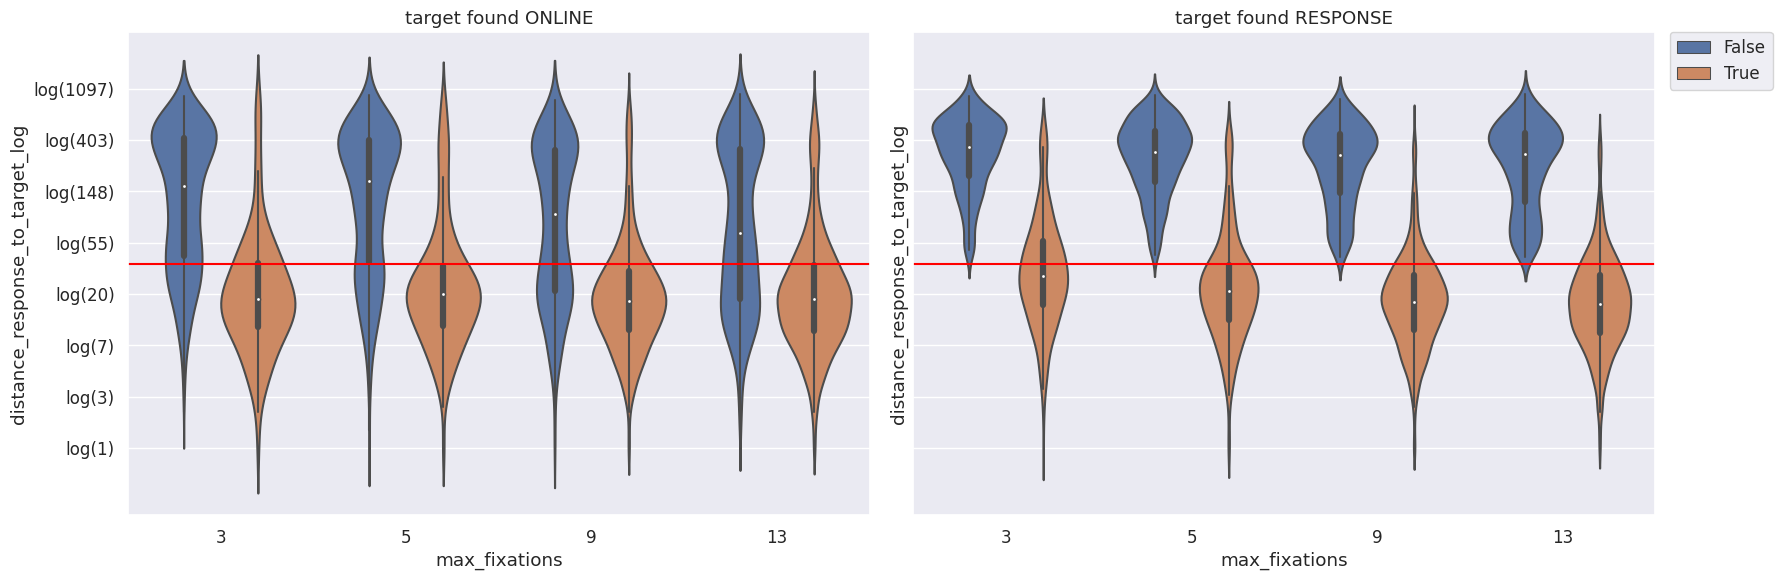

In [54]:
_,ax=plt.subplots(1,2, sharey=True, figsize=(18,6))

#g = sns.boxplot(x='max_fixations',
g = sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found',
            data=responses_data,
            ax=ax[0])    

ax[0].legend([], frameon=False)
ax[0].set_title('target found ONLINE')
ax[0].set_yticks(range(8))
ax[0].set_yticklabels([f'log({np.exp(x):.0f})' for x in range(8)])
sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found_response',
            data=responses_data,
            ax=ax[1])
ax[1].set_title('target found RESPONSE')
ax[0].axhline(np.log(36),color='red')
ax[1].axhline(np.log(36),color='red')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
# plt.savefig(os.path.join(figs_path, f'grid_{var}_violinplot.png'))

### Respuesta objetiva - last fix

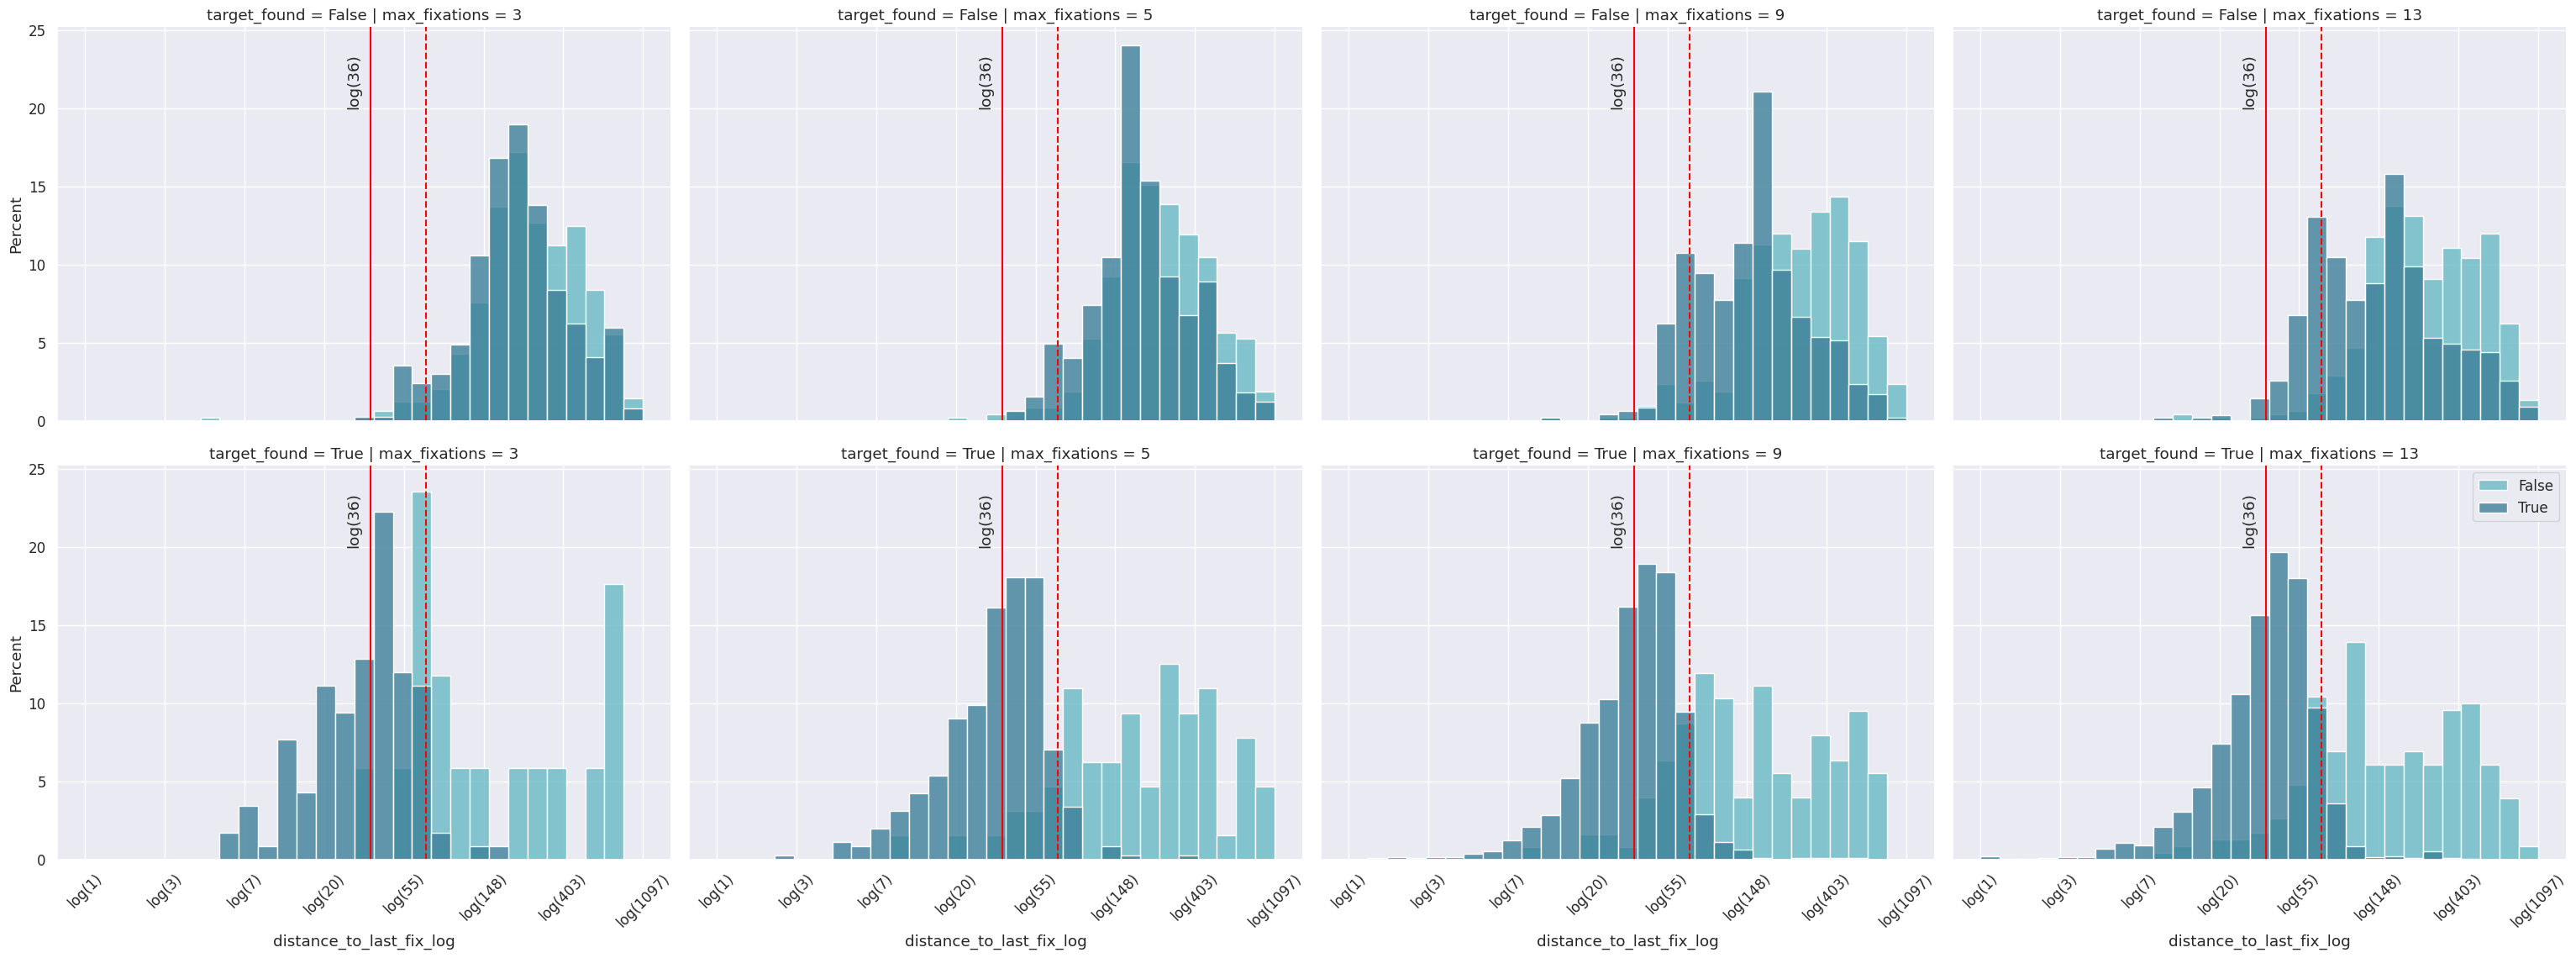

In [55]:
# distance_to_last_fix_log
var = "distance_to_last_fix_log"
grid = sns.FacetGrid(responses_data, col="max_fixations", row='target_found', hue='target_found_response',
                    palette="GnBu_d", height=5.8, aspect=1.33)

bins_hist = np.linspace(0,7,30)
grid.map(sns.histplot, var,bins=bins_hist, stat='percent', alpha=0.8, common_norm=False);
for i, ax in enumerate(grid.axes.ravel()):
    ax.axvline(np.log(36),color='red')
    ax.axvline(np.log(72),color='red',ls='--')
    trans = ax.get_xaxis_transform()
    ax.text(np.log(36)-0.3, .8, 'log(36)', transform=trans, rotation=90)
    if i > 3:
        ax.set_xticks(range(8))
        ax.set_xticklabels([f'log({np.exp(x):.0f})' for x in range(8)], rotation=45)
    
grid.tight_layout()
plt.legend()
# plt.savefig(os.path.join(figs_path, f'grid_{var}.png'))

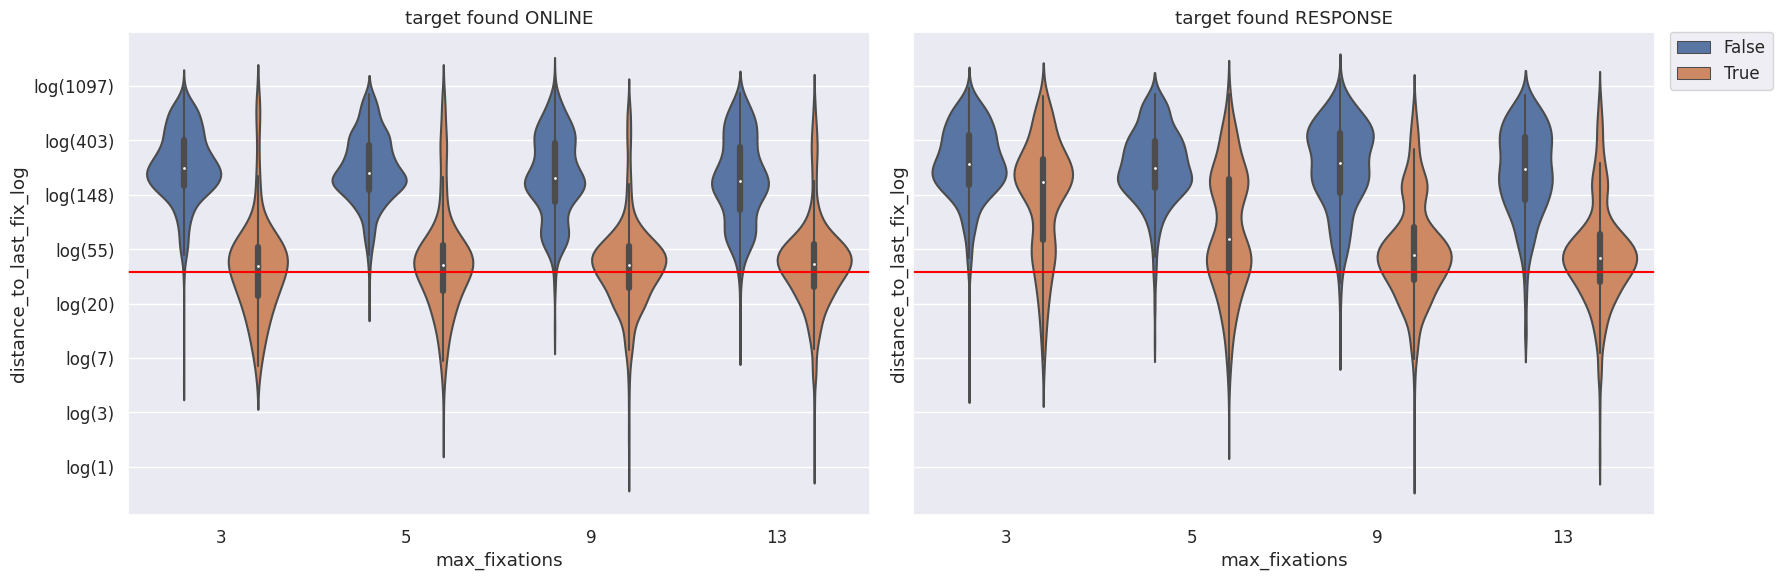

In [56]:
_,ax=plt.subplots(1,2, sharey=True, figsize=(18,6))

g = sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found',
            data=responses_data,
            ax=ax[0])

ax[0].legend([], frameon=False)
ax[0].set_title('target found ONLINE')
ax[0].set_yticks(range(8))
ax[0].set_yticklabels([f'log({np.exp(x):.0f})' for x in range(8)])
sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found_response',
            data=responses_data,
            ax=ax[1])
ax[1].set_title('target found RESPONSE')
ax[0].axhline(np.log(36),color='red')
ax[1].axhline(np.log(36),color='red')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
# plt.savefig(os.path.join(figs_path, f'grid_{var}_violinplot.png'))

### Respuesta subjetiva

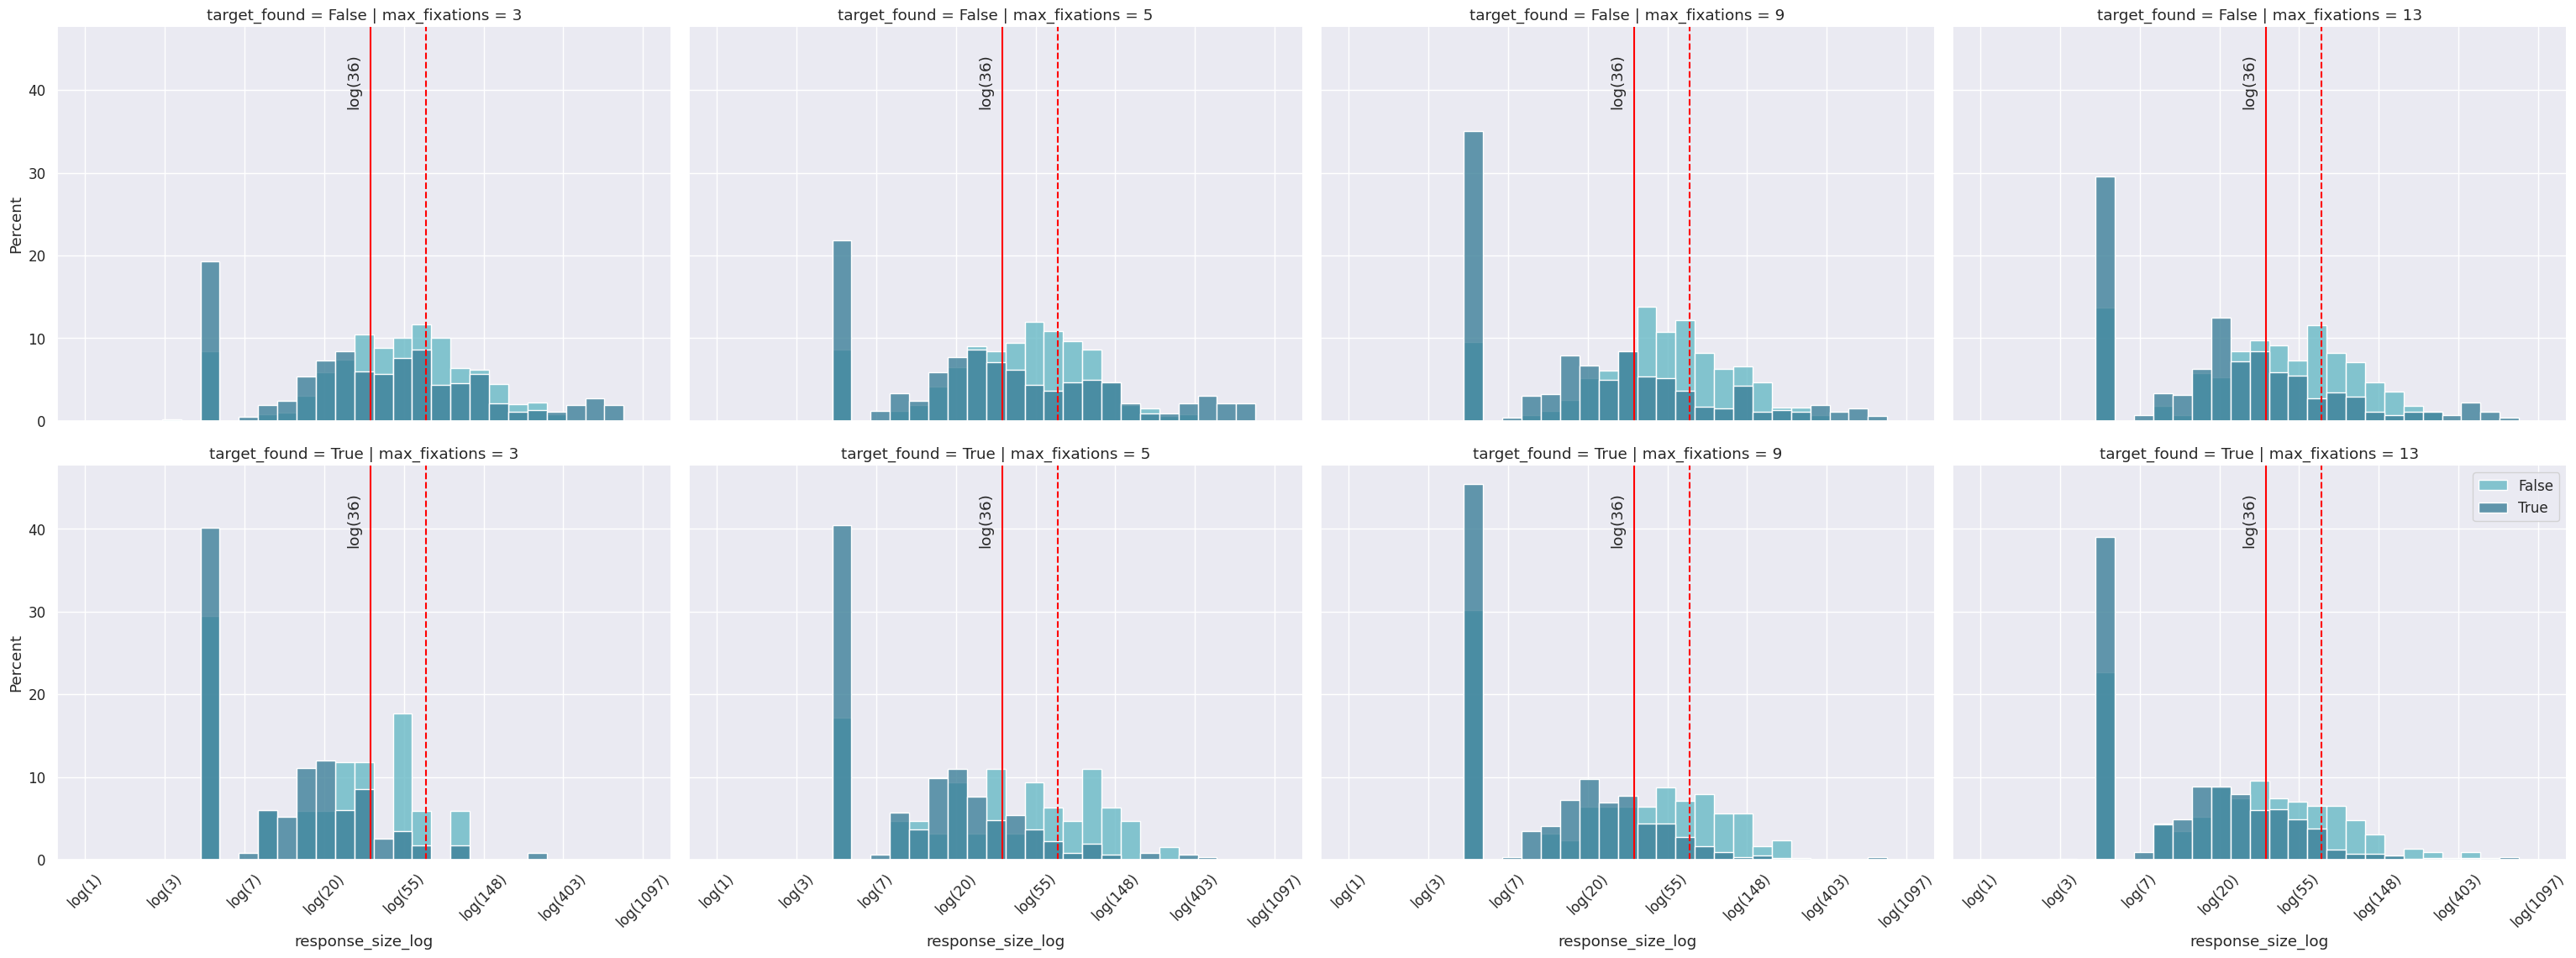

In [57]:
# response_size_log
var = "response_size_log"
grid = sns.FacetGrid(responses_data, col="max_fixations", row='target_found', hue='target_found_response',
                    palette="GnBu_d", height=5.8, aspect=1.33)
bins_hist = np.linspace(0,7,30)
grid.map(sns.histplot, var,bins=bins_hist, stat='percent', alpha=0.8, common_norm=False);
for i, ax in enumerate(grid.axes.ravel()):
    ax.axvline(np.log(36),color='red')
    ax.axvline(np.log(72),color='red',ls='--')
    trans = ax.get_xaxis_transform()
    ax.text(np.log(36)-0.3, .8, 'log(36)', transform=trans, rotation=90)
    if i > 3:
        ax.set_xticks(range(8))
        ax.set_xticklabels([f'log({np.exp(x):.0f})' for x in range(8)], rotation=45)
    
grid.tight_layout()
plt.legend()
# plt.savefig(os.path.join(figs_path, f'grid_{var}.png'))

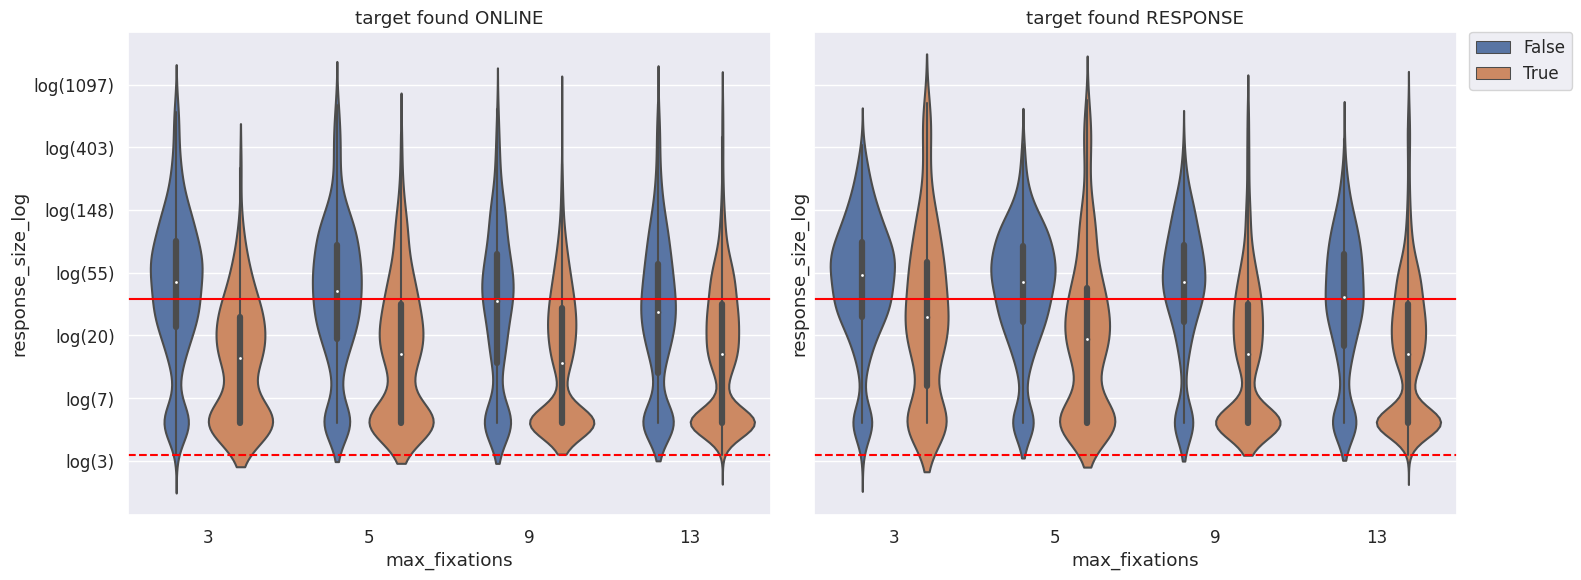

In [58]:
_,ax=plt.subplots(1,2, sharey=True, figsize=(16,6))

g = sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found',
            data=responses_data,
            ax=ax[0])

ax[0].legend([], frameon=False)
ax[0].set_title('target found ONLINE')
ax[0].set_yticks(range(8))
ax[0].set_yticklabels([f'log({np.exp(x):.0f})' for x in range(8)])
sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found_response',
            data=responses_data,
            ax=ax[1])
ax[1].set_title('target found RESPONSE')
ax[0].axhline(np.log(36),color='red')
ax[0].axhline(np.log(3),color='red', ls='--')
ax[1].axhline(np.log(36),color='red')
ax[1].axhline(np.log(3),color='red', ls='--')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
# plt.savefig(os.path.join(figs_path, f'grid_{var}_violinplot.png'))

### Tiempo entre respuestas

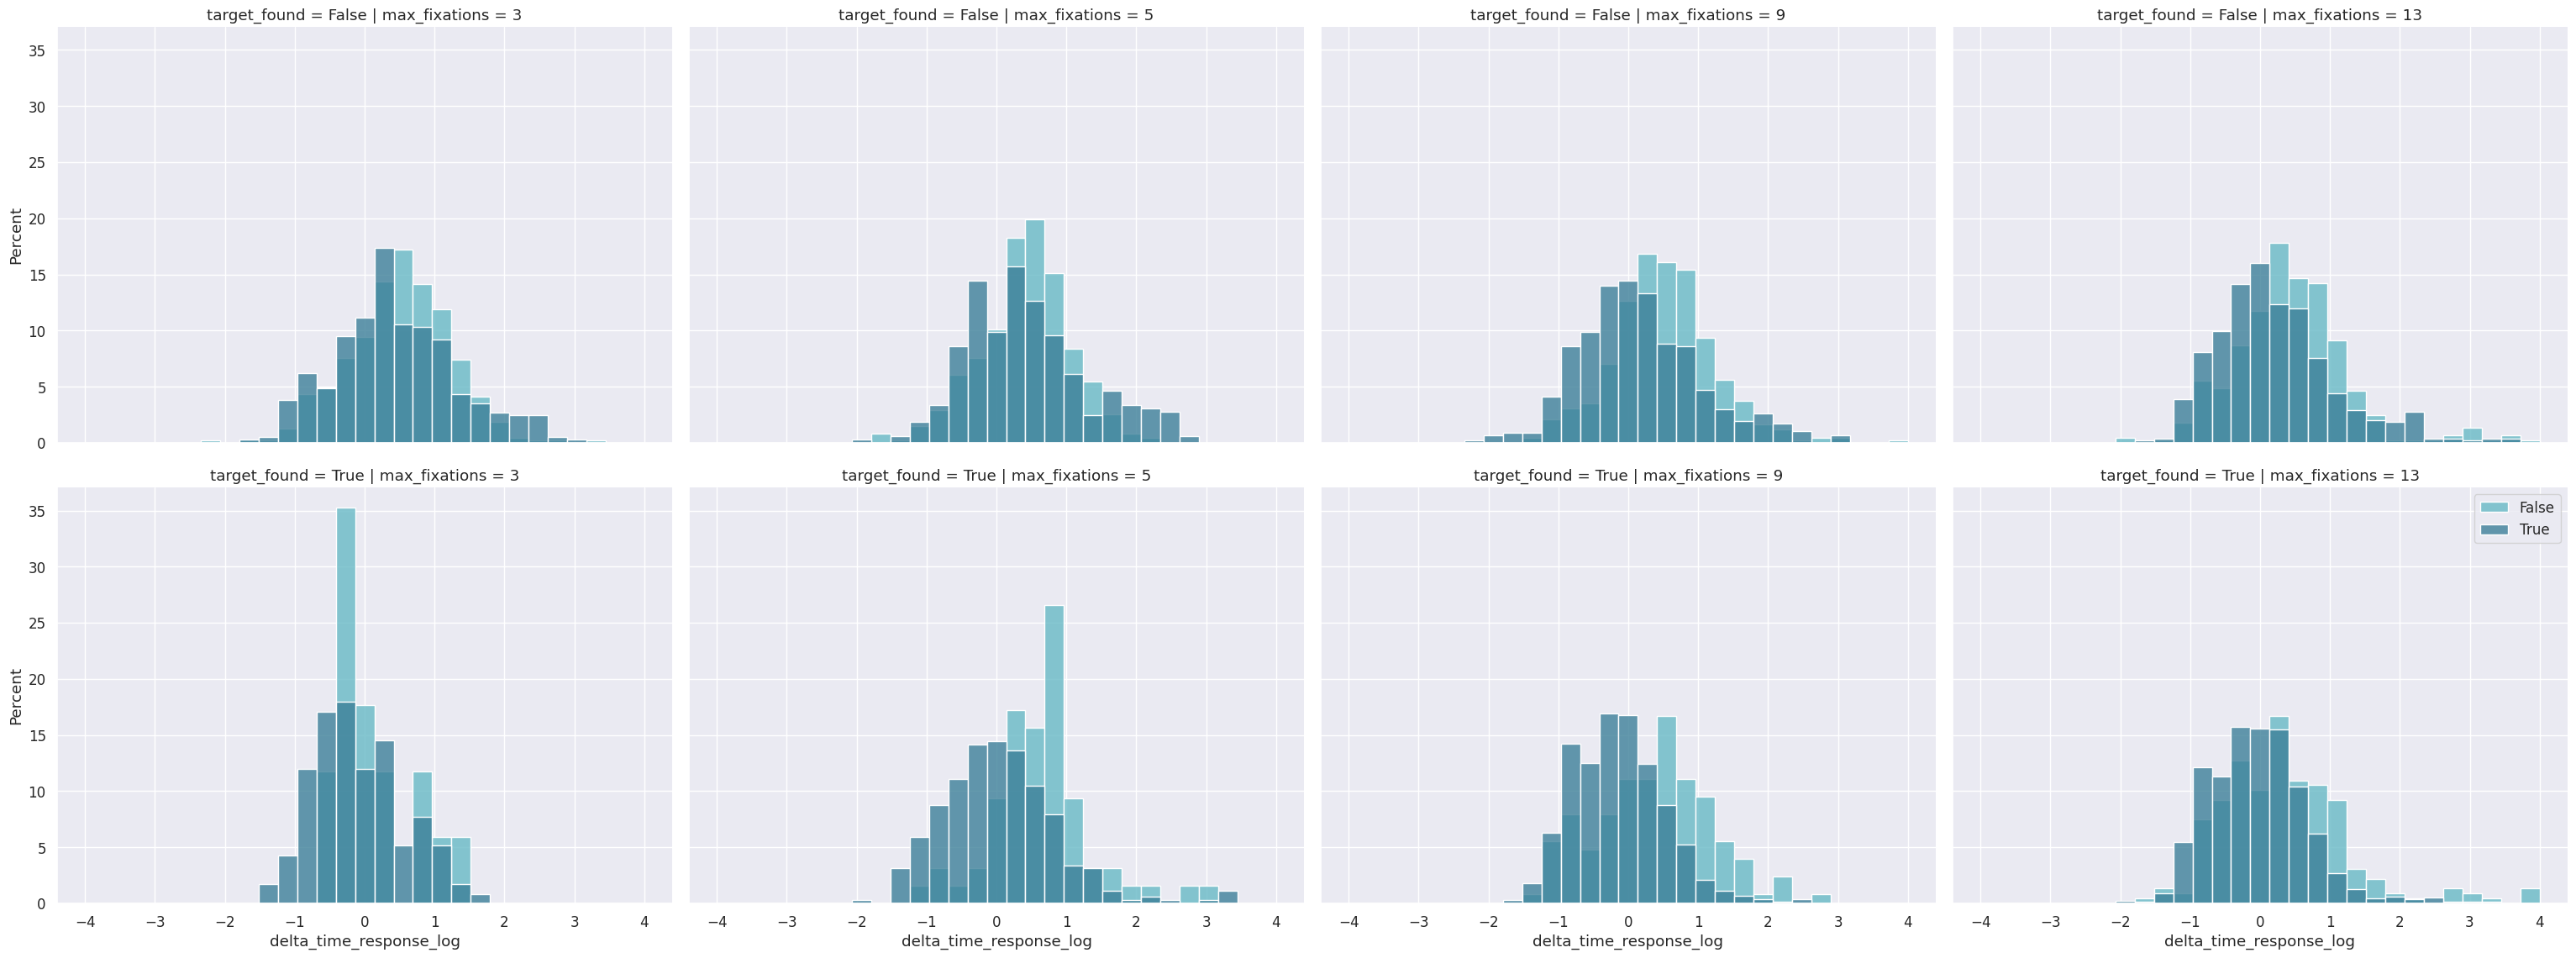

In [59]:
# delta_time_response_log
var = "delta_time_response_log"
grid = sns.FacetGrid(responses_data, col="max_fixations", row='target_found', hue='target_found_response',
                    palette="GnBu_d", height=5.8, aspect=1.33)

bins_hist = np.linspace(-4,4,30)
grid.map(sns.histplot, var, bins=bins_hist, stat='percent', alpha=0.8, common_norm=False);

grid.tight_layout()
plt.legend()
# plt.savefig(os.path.join(figs_path, f'grid_{var}.png'))


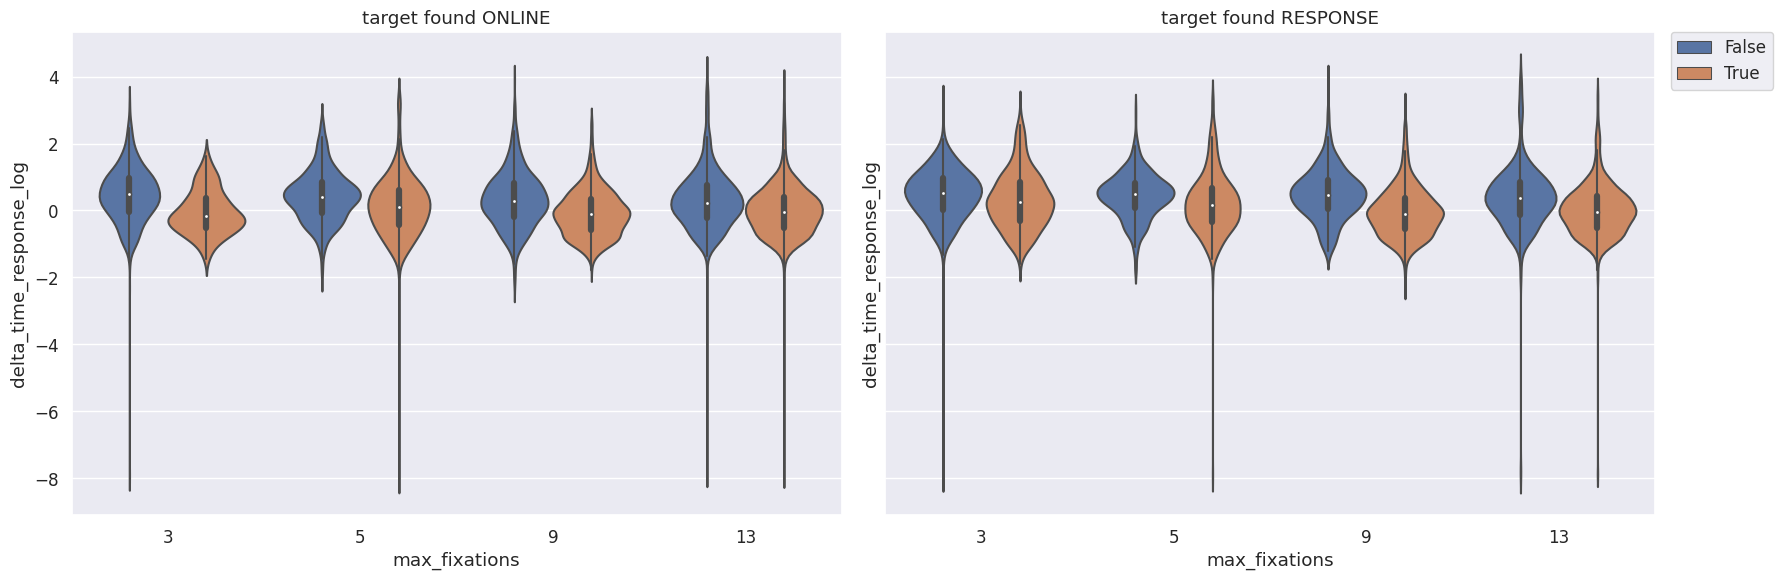

In [60]:
_,ax=plt.subplots(1,2, sharey=True, figsize=(18,6))

g = sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found',
            data=responses_data,
            ax=ax[0])

ax[0].legend([], frameon=False)
ax[0].set_title('target found ONLINE')
sns.violinplot(x='max_fixations',
            y=var,
            hue='target_found_response',
            data=responses_data,
            ax=ax[1])
ax[1].set_title('target found RESPONSE')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
# plt.savefig(os.path.join(figs_path, f'grid_{var}_violinplot.png'))

---
# Análisis agrupado (4-cat)

Hay básicamente 4 grupos dependiendo si encontró el **target de manera online** (TFO) y **si lo encontró con la respuesta** (TFR):

|                | Encontró el target con la respuesta | No encontró el target con la respuesta |
|----------------|------------------------------------|---------------------------------------|
| Vio el target   | TFO & TFR                          | TFO & ~TFR                            |
| No vio el target| ~TFO & TFR                         | ~TFO & ~TFR                           |

Este cuadro de doble entrada muestra los cuatro grupos de nuestro interés. La columna de la izquierda indica si el participante vio o no el target de manera online (TFO), mientras que la fila superior indica si el participante encontró o no el target con la respuesta (TFR). Los cuatro grupos se encuentran en las celdas correspondientes a la intersección de estas dos variables.

Puedo renombrarlas asi:
- TFCR: Target Found y Correct Response
- TFIR: Target Found y Incorrect Response
- TNCR: Target Not-found y Correct Response
- TNIR: Target Not-found y Incorrect Response

In [202]:
# Crear una tabla de frecuencias cruzadas
table = pd.crosstab(responses_data['target_found'], responses_data['target_found_response'])
# Ordenar las filas y columnas
table = table.reindex([True, False], axis=0).reindex([True, False], axis=1)
# Agregar las marginales
table.loc['Total'] = table.sum()
table['Total'] = table.sum(axis=1)
table

target_found_response  True  False  Total
target_found                             
True                   3322    437   3759
False                  1704   1845   3549
Total                  5026   2282   7308

In [201]:
def cat_trial(row):
    if row['target_found'] and row['target_found_response']:
        return 'TFO & TFR'
    elif ~row['target_found'] and row['target_found_response']:
        return '~TFO & TFR'
    elif row['target_found'] and ~row['target_found_response']:
        return 'TFO & ~TFR'
    elif ~row['target_found'] and ~row['target_found_response']:
        return '~TFO & ~TFR'
    else:
        return 'ERROR'
responses_data_cat_col = []
for idx, row in responses_data.iterrows():
    responses_data_cat_col.append(cat_trial(row))
responses_data['found_category'] = responses_data_cat_col
responses_data.found_category.value_counts()

TFO & TFR      3322
~TFO & ~TFR    1845
~TFO & TFR     1704
TFO & ~TFR      437
Name: found_category, dtype: int64

In [63]:
# Separo los casos donde no encontraron el target online pero si la respuesta
online_not_found_response_found = ~responses_data.target_found & responses_data.target_found_response
responses_data['online_not_found_response_found'] = online_not_found_response_found
print(responses_data.online_not_found_response_found.sum())
responses_data.target_found.value_counts()


1704


True     3759
False    3549
Name: target_found, dtype: int64

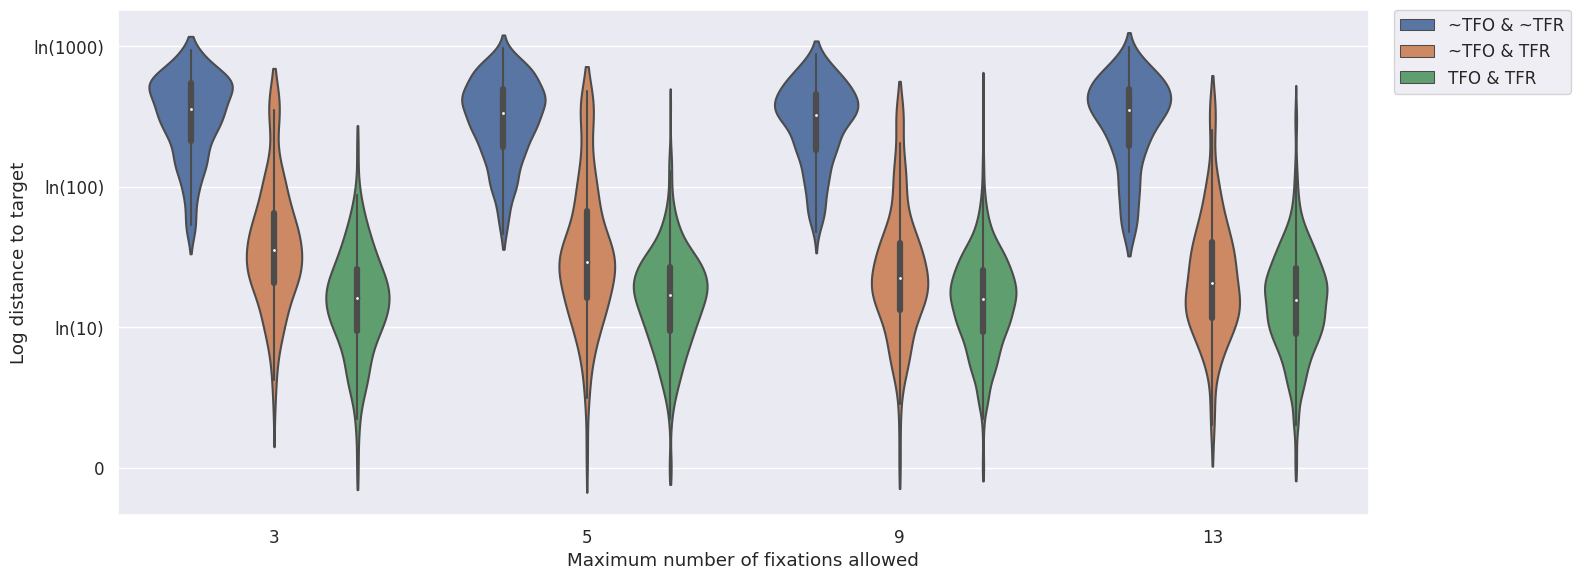

In [64]:
#var = "response_size_log"
#var = "distance_to_last_fix_log"
var = "distance_response_to_target_log"

# grid = sns.FacetGrid(responses_data[responses_data.online_not_found_response_found], col="max_fixations",
#                     palette="GnBu_d", height=7, aspect=1.2)
# 
# bins_hist = np.linspace(0,7,30)
# grid.map(sns.histplot, var, bins=bins_hist, stat='percent', alpha=0.8, common_norm=False);
# for i, ax in enumerate(grid.axes.ravel()):
#     ax.axvline(np.log(36),color='red')
#     ax.axvline(np.log(72),color='red',ls='--')
#     trans = ax.get_xaxis_transform()
#     ax.text(np.log(36)-0.3, .8, 'log(36)', transform=trans, rotation=90)
#     if i > 3:
#         ax.set_xticks(range(8))
#         ax.set_xticklabels([f'log({np.exp(x):.0f})' for x in range(8)], rotation=45)

_,ax=plt.subplots(1,1, sharey=True, figsize=(16,6))

g = sns.violinplot(x='max_fixations',
            y=var,
            hue='found_category',
            data=responses_data[responses_data.found_category != 'TFO & ~TFR'],
            cut=np.log(3),
            ax=ax)
#ax.set_title('Response size according max_fix and trial type')

#ax.axhline(np.log(36),color='red')
#ax.axhline(np.log(3),color='red', ls='--')
# estra pedido Juan
ax.set_xlabel('Maximum number of fixations allowed')

#ax.set_ylabel('Log response size')
ax.set_ylabel('Log distance to target')

#ax.set_yticks(range(8))
ax.set_yticks([0, np.log(10), np.log(100), np.log(1000)])
#ax.set_yticklabels([f'log({np.exp(x):.0f})' for x in range(8)])
ax.set_yticklabels(['0','ln(10)', 'ln(100)', 'ln(1000)'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, f'{var}_found_category.png'))

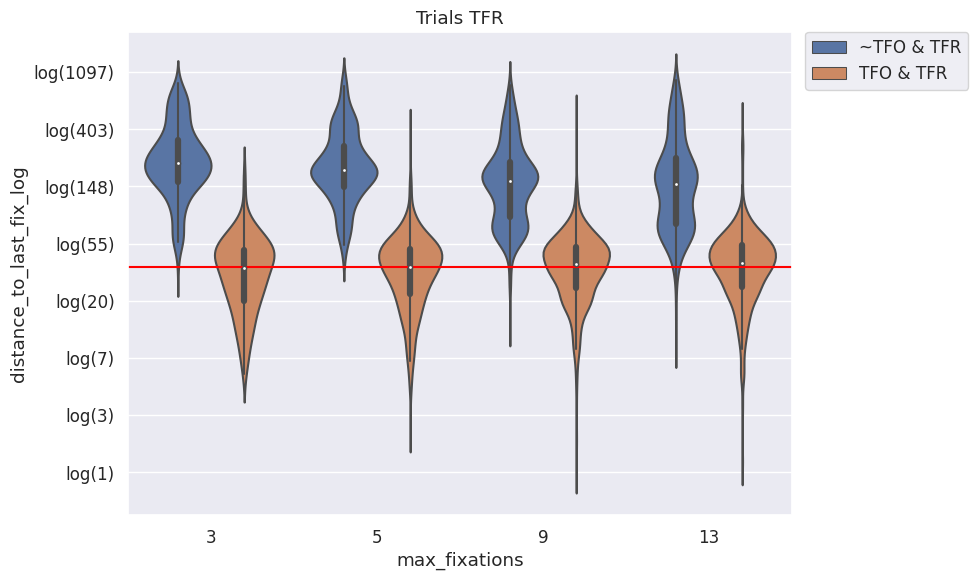

In [65]:
var = "distance_to_last_fix_log"

_,ax=plt.subplots(1,1, sharey=True, figsize=(10,6))

g = sns.violinplot(x='max_fixations',
            y=var,
            hue='found_category',
            data=responses_data[responses_data.found_category.isin(['TFO & TFR', '~TFO & TFR'])],
            ax=ax)
ax.set_title('Trials TFR')
ax.axhline(np.log(36),color='red')
ax.set_yticks(range(8))
ax.set_yticklabels([f'log({np.exp(x):.0f})' for x in range(8)])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, f'{var}_found_response.png'))

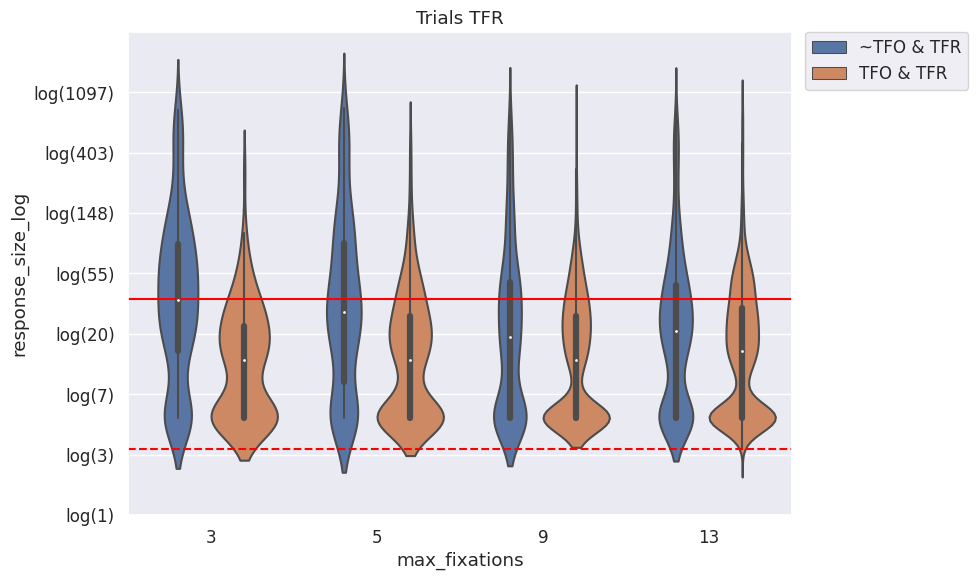

In [66]:
var = "response_size_log"

_,ax=plt.subplots(1,1, sharey=True, figsize=(10,6))

g = sns.violinplot(x='max_fixations',
            y=var,
            hue='found_category',
            data=responses_data[responses_data.found_category.isin(['TFO & TFR', '~TFO & TFR'])],
            ax=ax)
ax.set_title('Trials TFR')
ax.axhline(np.log(36),color='red')
ax.set_yticks(range(8))
ax.set_yticklabels([f'log({np.exp(x):.0f})' for x in range(8)])
ax.axhline(np.log(3),color='red', ls='--')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, f'{var}_found_response.png'))

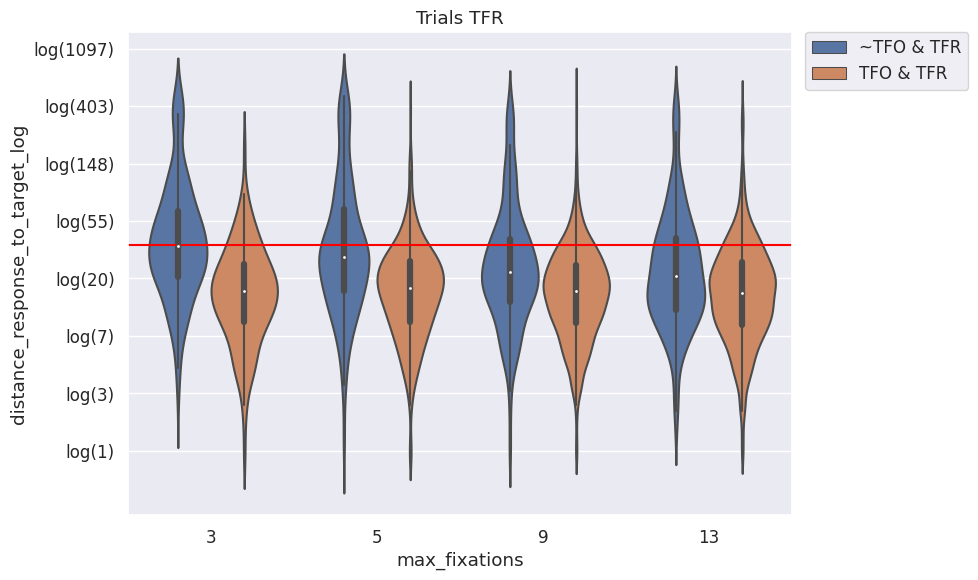

In [67]:
# Solamente por debug
var = "distance_response_to_target_log"

_,ax=plt.subplots(1,1, sharey=True, figsize=(10,6))

g = sns.violinplot(x='max_fixations',
            y=var,
            hue='found_category',
            data=responses_data[responses_data.found_category.isin(['TFO & TFR', '~TFO & TFR'])],
            ax=ax)

ax.set_title('Trials TFR')
ax.axhline(np.log(36),color='red')
ax.set_yticks(range(8))
ax.set_yticklabels([f'log({np.exp(x):.0f})' for x in range(8)])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, f'{var}_found_response.png'))

### Online found y respuesta not found
La pregunta aca es si encontraron realmente el target en estos casos. Una cosa que podemos usar es el tiempo de fijación en el cual observaron el target

In [70]:
print('Total de trials donde se encontró el target online:',responses_data.target_found.sum())

print('Total de trials donde se encontró el target en respuesta:', 
        responses_data.target_found_response.sum())

print('Total de trials con target found online y respuesta:',
        responses_data[(responses_data.target_found) & (responses_data.target_found_response)].shape[0])
        
print('Total de trials con target found online pero que no acertaron en respuesta:',
        responses_data[(responses_data.target_found) & ~(responses_data.target_found_response)].shape[0])


Total de trials donde se encontró el target online: 3759
Total de trials donde se encontró el target en respuesta: 5026
Total de trials con target found online y respuesta: 3322
Total de trials con target found online pero que no acertaron en respuesta: 437


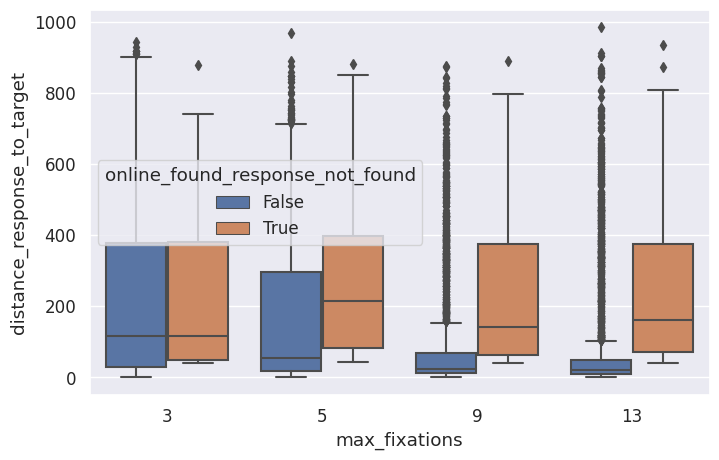

In [154]:
# Analicemos los sujetos que se supone que vieron el target pero en la respuesta no lo vieron

online_found_response_not_found = responses_data.target_found & ~responses_data.target_found_response
responses_data['online_found_response_not_found'] = online_found_response_not_found

_,ax=plt.subplots(1,1, figsize=(8,5))

# Boxplot de los casos encontrados online pero no con la respuesta
sns.boxplot(x='max_fixations',
            y='distance_response_to_target',
            hue='online_found_response_not_found',
            data=responses_data,
            ax=ax
            )

plt.show()

---
# Modelado de la respuesta

Esta parte no esta explorada en profundidad

## Modelito lineal

La idea es tratar de ver si existe una relación entre que tan lejos estuvo del target al tratar de adivinar, la pregunta a responder sería:

- ¿Los sujetos juzgan bien su decisión? Es decir, si a medida que le acertaron al target en su respuesta, ¿el tamaño de la respuesta subjetiva es mas pequeño?
- Y si desagregamos por target found, los que vieron el target, ¿su tamaño genera una mejor respuesta subjetiva?

(0.0, 400.0)

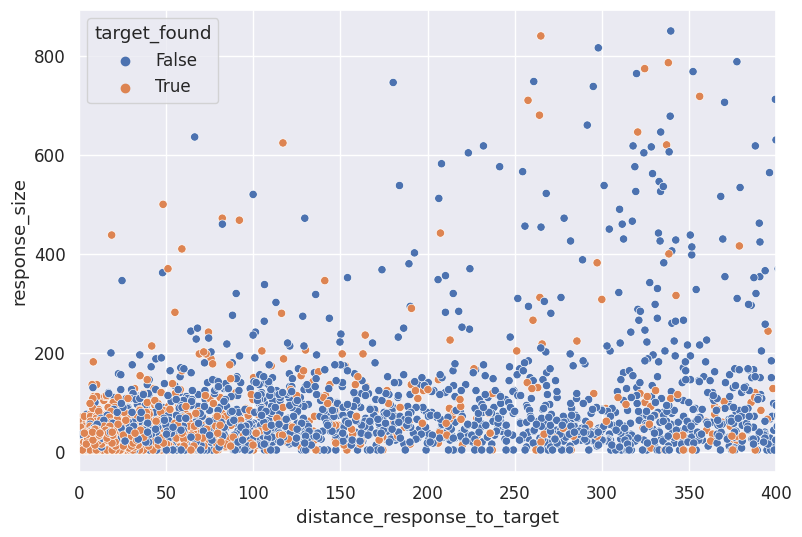

In [80]:
fig, ax = plt.subplots(1,1, figsize=(9,6))
sns.scatterplot(x='distance_response_to_target', y='response_size',hue='target_found', data=responses_data, ax=ax);
ax.set_xlim(0,400)

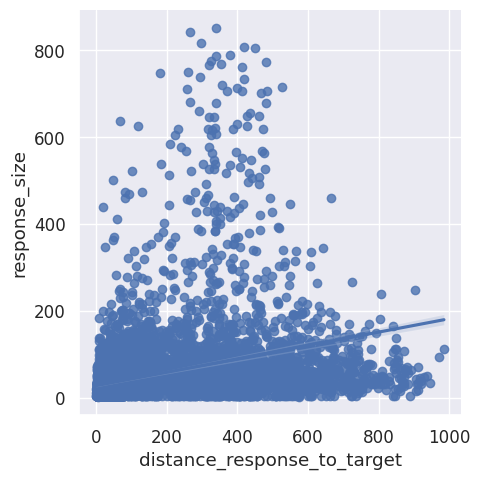

In [81]:
sns.lmplot(x='distance_response_to_target', y='response_size', data=responses_data);

In [82]:
import statsmodels.api as sm
X = sm.add_constant(responses_data['distance_response_to_target'].to_numpy())
y = responses_data['response_size'].to_numpy().reshape(-1,1)
mod = sm.OLS(y,X)
res = mod.fit()
#print(res.summary())

print(f'All estimated params, constant: {res._results.params[0]:.2f}, distance_response_to_target: {res._results.params[1]:.2f}')

All estimated params, constant: 28.23, distance_response_to_target: 0.15


In [83]:
# desagregamos por target found
responses_data_found = responses_data.query('target_found==True')
responses_data_not_found = responses_data.query('target_found==False')
print(responses_data_found.shape)
print(responses_data_not_found.shape)

(3759, 23)
(3549, 23)


In [84]:
# response_size vs distance to target for target found
import statsmodels.api as sm
X = sm.add_constant(responses_data_found['distance_response_to_target'].to_numpy())
y = responses_data_found['response_size'].to_numpy().reshape(-1,1)
mod = sm.OLS(y,X)
res_found = mod.fit()
#print(res_found.summary())

print(f'Found estimated params, constant: {res_found._results.params[0]:.2f}, distance_response_to_target: {res_found._results.params[1]:.2f}')

# response_size vs distance to target for target not found
X = sm.add_constant(responses_data_not_found['distance_response_to_target'].to_numpy())
y = responses_data_not_found['response_size'].to_numpy().reshape(-1,1)
mod = sm.OLS(y,X)
res_not_found = mod.fit()
#print(res_not_found.summary())

print(f'Not found estimated params, constant: {res_not_found._results.params[0]:.2f}, distance_response_to_target: {res_not_found._results.params[1]:.2f}')

Found estimated params, constant: 19.08, distance_response_to_target: 0.20
Not found estimated params, constant: 43.37, distance_response_to_target: 0.12


*Conclusion parcial*

Parece fuerte el efecto del intercept en el caso de que hayan encontrado el target, es decir que que parece que juzgan mejor sus respuestas. Algunos poxsibles todo's:
- Pasar los valores a angulos
- Son significativas esas diferencias?
- Tiene sentido meter mas regresiones en el medio?
- Chequeo de supuestos?

(7304, 23)


/home/gastonb/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


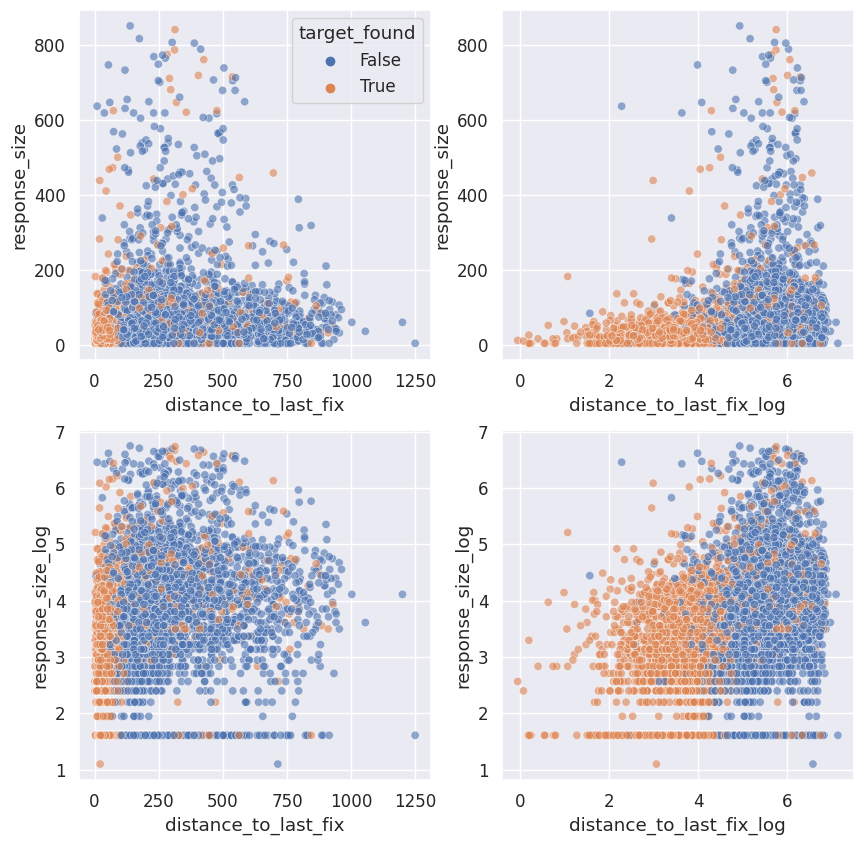

In [85]:
# lo mismo pero ahora consideramos todo en el dominio logaritmico
responses_data_log = responses_data.copy()
responses_data_log['distance_response_to_target_log'] = np.log(responses_data_log['distance_response_to_target'])
responses_data_log['response_size_log'] = np.log(responses_data_log['response_size'])
responses_data_log['distance_to_last_fix_log'] = np.log(responses_data_log['distance_to_last_fix'])
responses_data_log.replace(-np.Inf, np.nan,inplace=True)
responses_data_log.dropna(inplace=True)
print(responses_data_log.shape)
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.scatterplot(x='distance_to_last_fix', y='response_size',hue='target_found', data=responses_data_log, ax=ax[0,0], alpha=0.6);
sns.scatterplot(x='distance_to_last_fix', y='response_size_log',hue='target_found', data=responses_data_log, ax=ax[1,0], alpha=0.6, legend=False);
sns.scatterplot(x='distance_to_last_fix_log', y='response_size',hue='target_found', data=responses_data_log, ax=ax[0,1], alpha=0.6, legend=False);
sns.scatterplot(x='distance_to_last_fix_log', y='response_size_log',hue='target_found', data=responses_data_log, ax=ax[1,1], alpha=0.6, legend=False);
#ax[1].set_xlim(-1,8)
plt.show()

In [86]:
# Modelo lineal para log vs log todos los datos

def linear_model(X_col: str = 'distance_to_last_fix_log', 
                 y_col: str = 'response_size_log',
                 extra_filter: str = None,
                 data=responses_data_log,
                 do_partial_plot=True,
                 figsize=(9,5)):
    """_summary_

    Args:
        X_col (str, optional): Defaults to 'distance_to_last_fix_log'.
        y_col (str, optional): Defaults to 'response_size_log'.
        extra_filter (str, optional): Query to do to data like 'target_found==True'. Defaults to None.
        data (pd.DataFrame, optional): Pandas DataFrame that contains the previous columns. Defaults to responses_data_log.
        do_partial_plot (bool, optional): Do partial regression plot from stats models. Defaults to True.
        figsize (tuple, optional): Defaults to (9,5).

    Returns:
        _type_: _description_
    """
    
    if extra_filter is not None:
        data = data.query(extra_filter)
    X = sm.add_constant(data[X_col].to_numpy())
    y = data[y_col].to_numpy().reshape(-1,1)
    mod = sm.OLS(y,X)
    res = mod.fit()
    print(f'Linear model: {y_col} ~ 1 + {X_col}')
    print(f'Estimated params, constant: {res._results.params[0]:.2f}, {X_col}: {res._results.params[1]:.2f}')
    if do_partial_plot:
        fig = sm.graphics.plot_partregress_grid(res, fig=plt.figure(figsize=figsize))
        fig.tight_layout(pad=1.0)

    return res

Linear model: response_size_log ~ 1 + distance_to_last_fix_log
Estimated params, constant: 0.97, distance_to_last_fix_log: 0.47
eval_env: 1
eval_env: 1


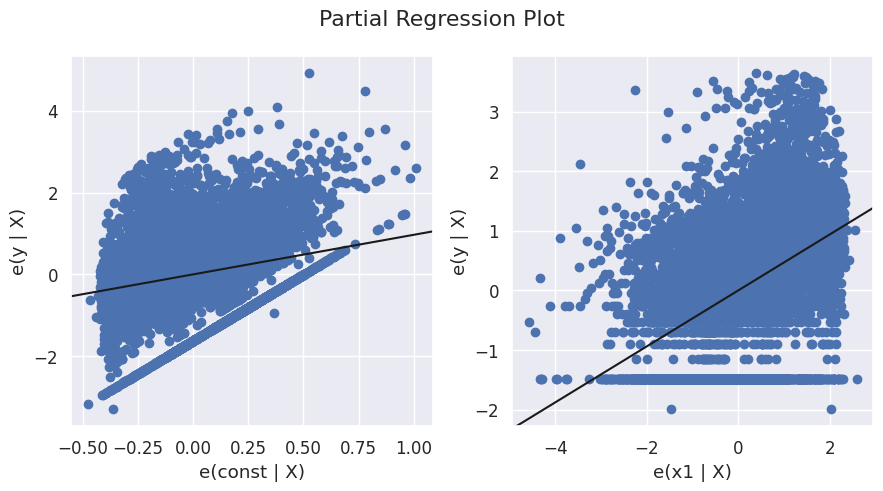

In [87]:
res = linear_model(X_col='distance_to_last_fix_log')

Linear model: response_size_log ~ 1 + distance_to_last_fix_log
Estimated params, constant: 1.18, distance_to_last_fix_log: 0.41
eval_env: 1
eval_env: 1


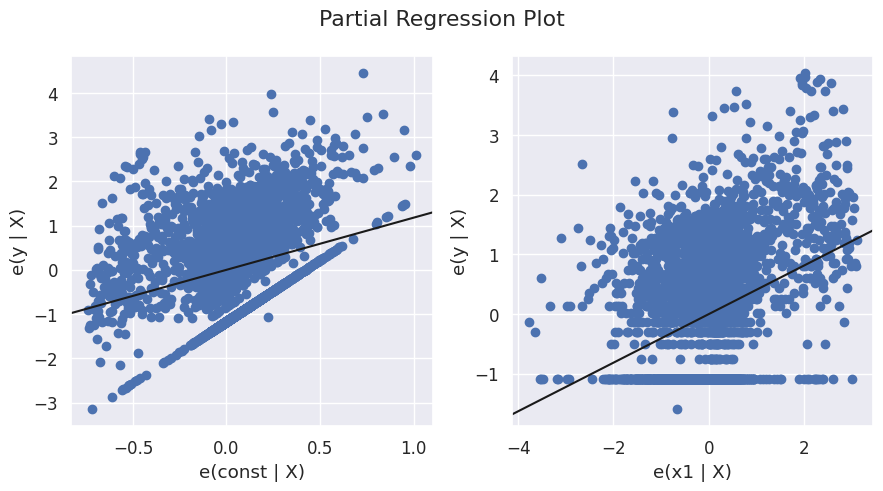

In [88]:
res = linear_model(X_col='distance_to_last_fix_log', extra_filter='target_found==True')

Linear model: response_size_log ~ 1 + distance_to_last_fix_log
Estimated params, constant: 0.88, distance_to_last_fix_log: 0.49
eval_env: 1
eval_env: 1


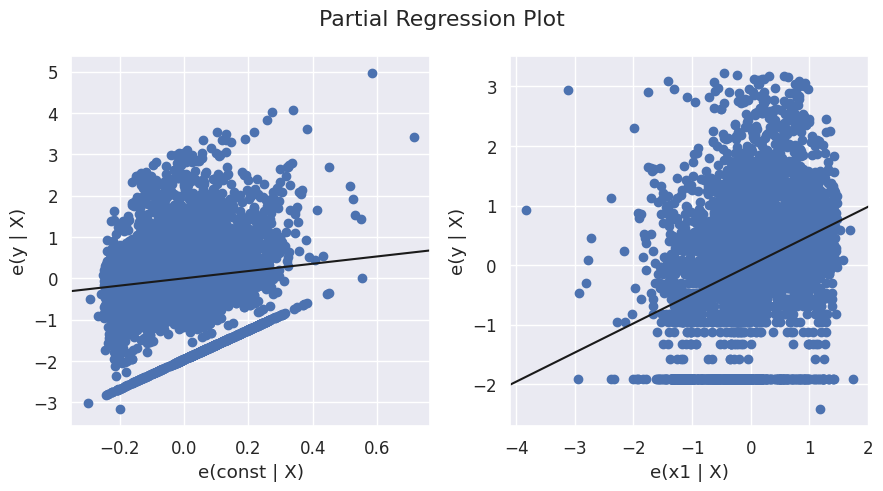

In [89]:
res = linear_model(X_col='distance_to_last_fix_log', extra_filter='target_found==False')

Linear model: response_size_log ~ 1 + distance_response_to_target_log
Estimated params, constant: 1.38, distance_response_to_target_log: 0.46
eval_env: 1
eval_env: 1


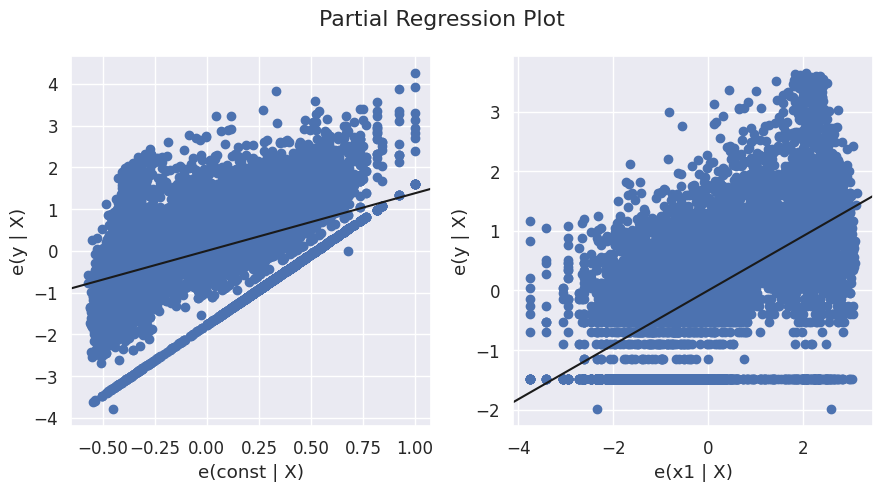

In [90]:
res = linear_model(X_col='distance_response_to_target_log')

Linear model: response_size_log ~ 1 + distance_response_to_target_log
Estimated params, constant: 1.42, distance_response_to_target_log: 0.43
eval_env: 1
eval_env: 1


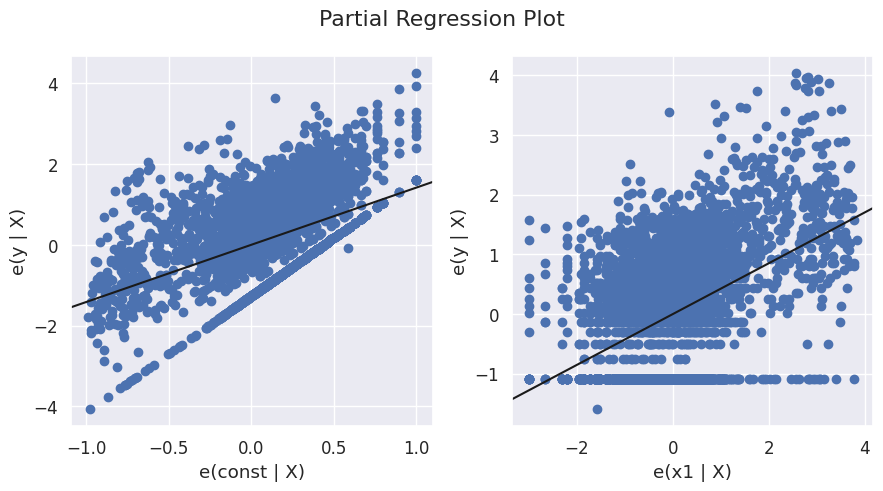

In [91]:
res = linear_model(X_col='distance_response_to_target_log', extra_filter='target_found==True')

Linear model: response_size_log ~ 1 + distance_response_to_target_log
Estimated params, constant: 1.54, distance_response_to_target_log: 0.43
eval_env: 1
eval_env: 1


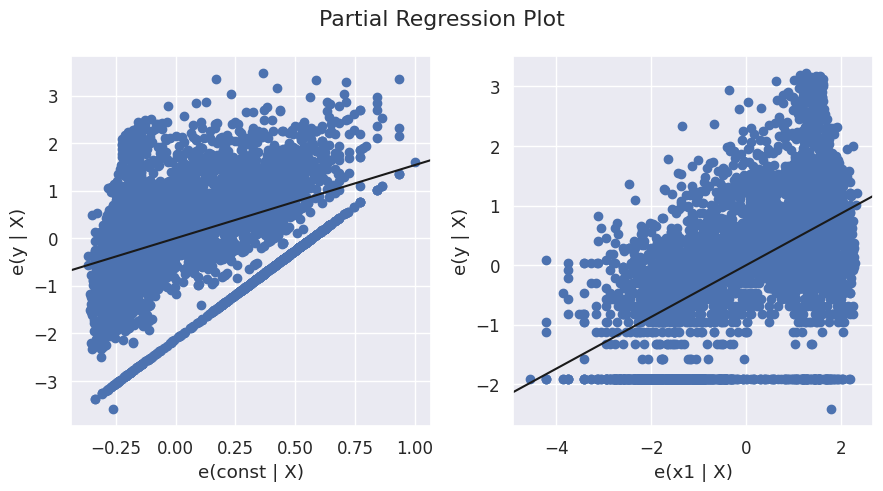

In [92]:
res = linear_model(X_col='distance_response_to_target_log', extra_filter='target_found==False')

*Conclusion parcial (logspace)*

Parece que la transformación al espacio logaritimo mata el efecto de la distancia al target de la respuesta objetiva, pero sigue estando la diferencia del efecto de la constante.
- Es significativo?

## Gaussian mixture

In [93]:
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

def fit_gaussian_mixture(df, col, n_components=2):
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    # filter out the outliers if any    
    X = df.loc[:,col]
    X = X[X != -np.inf]
    X = X.to_numpy().reshape(-1,1)
    gmm.fit(X)

    # plot the data and the mixture of gaussians
    x = np.linspace(np.min(X), np.max(X)+5, len(X)).reshape(-1,1)
    y = np.exp(gmm.score_samples(x))
    _, ax = plt.subplots(1,2, figsize=(12,6)) 
    ax[0].plot(x,y, color='blue')
    ax[0].hist(X, density=True, bins=30,alpha=0.5, color='cornflowerblue');
    val, bins, _ = ax[1].hist(X, bins=30, density=True, alpha=0.5, color='cornflowerblue')
    #area = sum(np.diff(bins)*val)  +  sum(np.diff(bins)*val)
    for i in range(n_components):
        mean_i = gmm.means_[i][0]
        std_i = np.sqrt(gmm.covariances_[i][0])[0]
        weight_i = gmm.weights_[i]
        y = norm.pdf(x, mean_i, std_i)*weight_i
        ax[1].plot(x,y)

    return gmm

GaussianMixture(n_components=2, random_state=0)

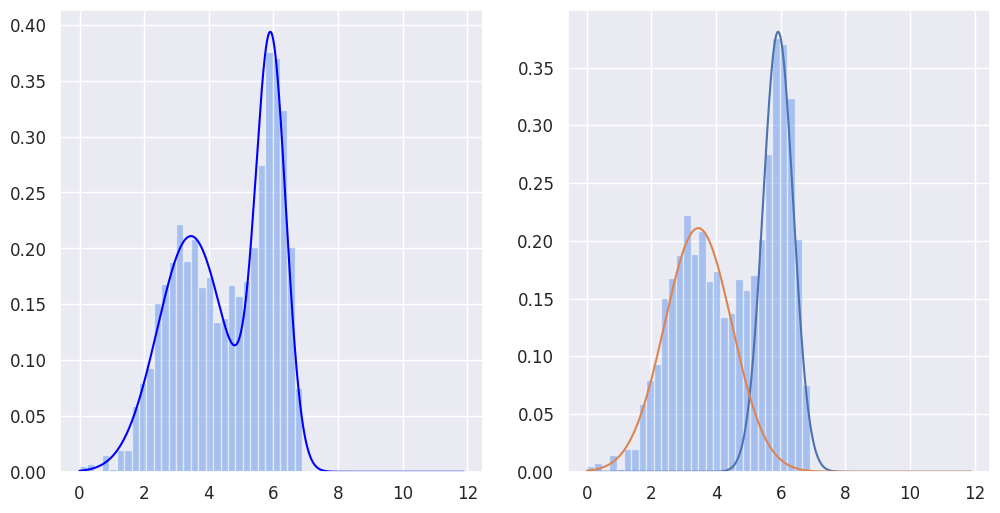

In [94]:
fit_gaussian_mixture(responses_data[~(responses_data.target_found)], col = 'distance_response_to_target_log' )

GaussianMixture(n_components=2, random_state=0)

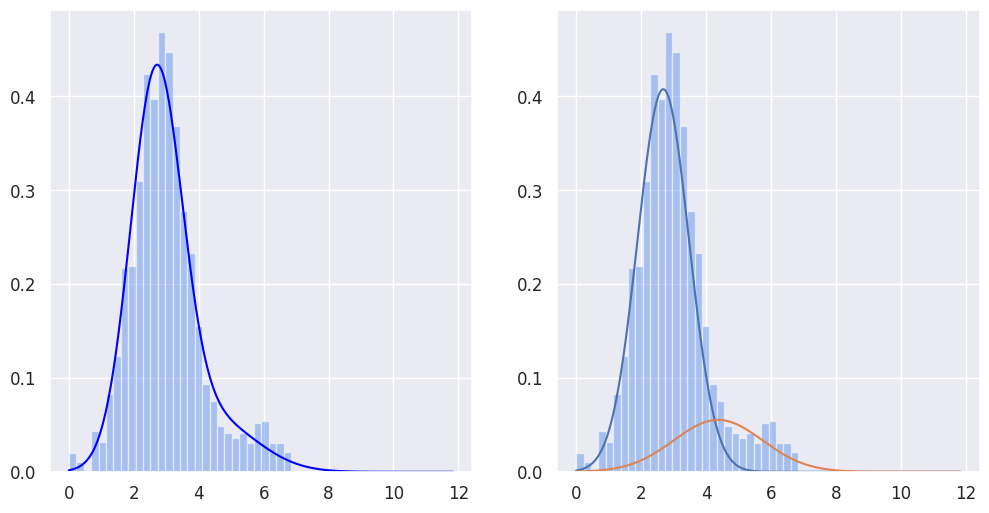

In [95]:
fit_gaussian_mixture(responses_data[responses_data.target_found], col = 'distance_response_to_target_log' )

---
# ADICIONAL: transformaciones Box-Cox?

Dado que las distribuciones no parecen ser normales podemos ver como corregir esos datos con transformaciones de Box-Cox para distance response to target.

-0.19521072001417542


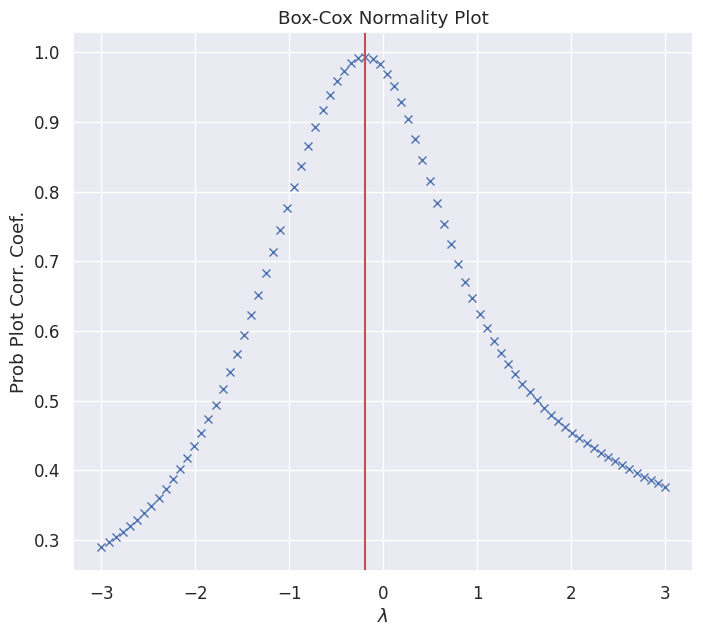

In [68]:
import scipy.stats as scp
_,ax=plt.subplots(1,1, sharey=True, figsize=(8,7))
x = responses_data[(responses_data.target_found)&(responses_data.distance_response_to_target>0)].loc[:,'distance_response_to_target']
prob = scp.boxcox_normplot(x,la=-3,lb=3, plot=ax)
_, maxlog = scp.boxcox(x)
ax.axvline(maxlog, color='r');
print(maxlog)


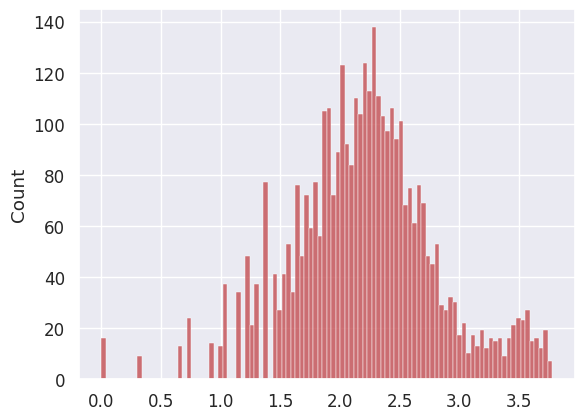

In [69]:
x_bc = scp.boxcox(x, maxlog)
sns.histplot(x_bc, bins=100, color='r', alpha=0.8);